![projeto](images/project.jpg)

# Análise de Dados de Campanhas Bancárias

## 1. Objetivo
Identificar quais fatores mais influenciam a aceitação de propostas de **depósito a prazo** por clientes em campanhas bancárias de telemarketing.

## 2. Sumário Executivo

A análise identificou os principais fatores que determinam a aceitação de propostas de depósito a prazo em campanhas bancárias de telemarketing, permitindo direcionar os esforços para clientes com maior probabilidade de conversão.

**Principais descobertas**
- Chamadas com duração superior a 360 segundos aumentam significativamente a taxa de aceitação, especialmente quando o cliente já teve contato prévio.
- Clientes com histórico de contato em campanhas anteriores apresentaram mais que o dobro da taxa de aceitação em comparação aos não contatados, mas contatos excessivos (≥ 11) reduzem a eficácia.
- Para clientes sem contato prévio, chamadas para celular apresentam maior taxa de conversão.
- Perfis mais propensos à aceitação incluem: saldo bancário acima de R$ 3.000, ausência de financiamento habitacional, maior escolaridade e ocupações como estudante, aposentado e desempregado.
- Perfis operacionais (blue-collar, housemaid) e clientes com financiamento habitacional apresentam menor probabilidade de aceitar.

**Recomendações estratégicas**
1. Priorizar clientes com histórico de contato e focar em chamadas de 360 a 657 segundos.
2. Para clientes sem histórico, dar preferência a ligações para celular.
3. Limitar o número de tentativas por campanha para evitar saturação.
4. Direcionar esforços para segmentos com maior potencial de aceitação conforme perfil identificado.

**Próximos passos**
- Implementar as estratégias sugeridas em campanhas-piloto e medir resultados.
- Revisar e ajustar parâmetros com base nos dados das próximas campanhas.


## 3. Sobre os Dados

Os dados utilizados nesta análise referem-se a campanhas de marketing direto de uma instituição bancária portuguesa.  
As campanhas foram baseadas em ligações telefônicas e, frequentemente, foi necessário realizar mais de um contato com o mesmo cliente para avaliar se ele aceitaria ou não subscrever o produto (depósito a prazo).

**Fonte:** [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)  

- **age**: idade do cliente (numérico).  
- **job**: tipo de trabalho/ocupação do cliente (categórico).  
- **marital**: estado civil (categórico).  
- **education**: nível de escolaridade (categórico).  
- **default**: possui inadimplência? (‘yes’, ‘no’, ‘unknown’).  
- **balance**: saldo médio anual na conta bancária (numérico, em euros).  
- **housing**: possui financiamento habitacional? (‘yes’, ‘no’).  
- **loan**: possui empréstimo pessoal? (‘yes’, ‘no’).  
- **contact**: tipo de canal de comunicação utilizado (‘cellular’, ‘telephone’).  
- **day**: dia do mês do último contato (numérico).  
- **month**: mês do último contato (string, abreviação).  
- **duration**: duração da última ligação (em segundos).  
- **campaign**: número de contatos realizados durante esta campanha (incluindo o último contato).  
- **pdays**: número de dias desde o último contato com o cliente em uma campanha anterior (-1 significa que o cliente não foi contatado antes).  
- **previous**: número de contatos realizados antes desta campanha.  
- **poutcome**: resultado da campanha anterior (‘success’, ‘failure’, ‘other’, ‘unknown’).  
- **response**: variável-alvo indicando se o cliente assinou o depósito a prazo (‘yes’, ‘no’).  


## 4. Preparação dos Dados


### **Carregamento**


#### Importação das bibliotecas
Nesta etapa, importamos todas as bibliotecas necessárias para manipulação, análise e visualização dos dados.

In [101]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import warnings
import re
from statsmodels.stats.proportion import proportions_chisquare
warnings.filterwarnings('ignore')


#### Carregamento do dataset
O dataset foi carregado em um DataFrame do pandas para possibilitar a exploração e análise.


In [102]:
df = pd.read_csv('data/dataset.csv')


#### Vizualizando o Dataframe

In [103]:
print(f"O DataFrame possui {df.shape[0]:,} linhas e {df.shape[1]:,} colunas.")

O DataFrame possui 45,211 linhas e 19 colunas.


In [104]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### **Tratamento de Nulos**

#### Análise de valores ausentes
Calculamos a quantidade de valores ausentes em cada coluna, identificando possíveis problemas que precisaremos tratar posteriormente.


Colunas com valores ausentes:
          Valores Ausentes  % de Valores Ausentes
age                     20               0.044237
salary                  26               0.057508
month                   50               0.110593
response                30               0.066356


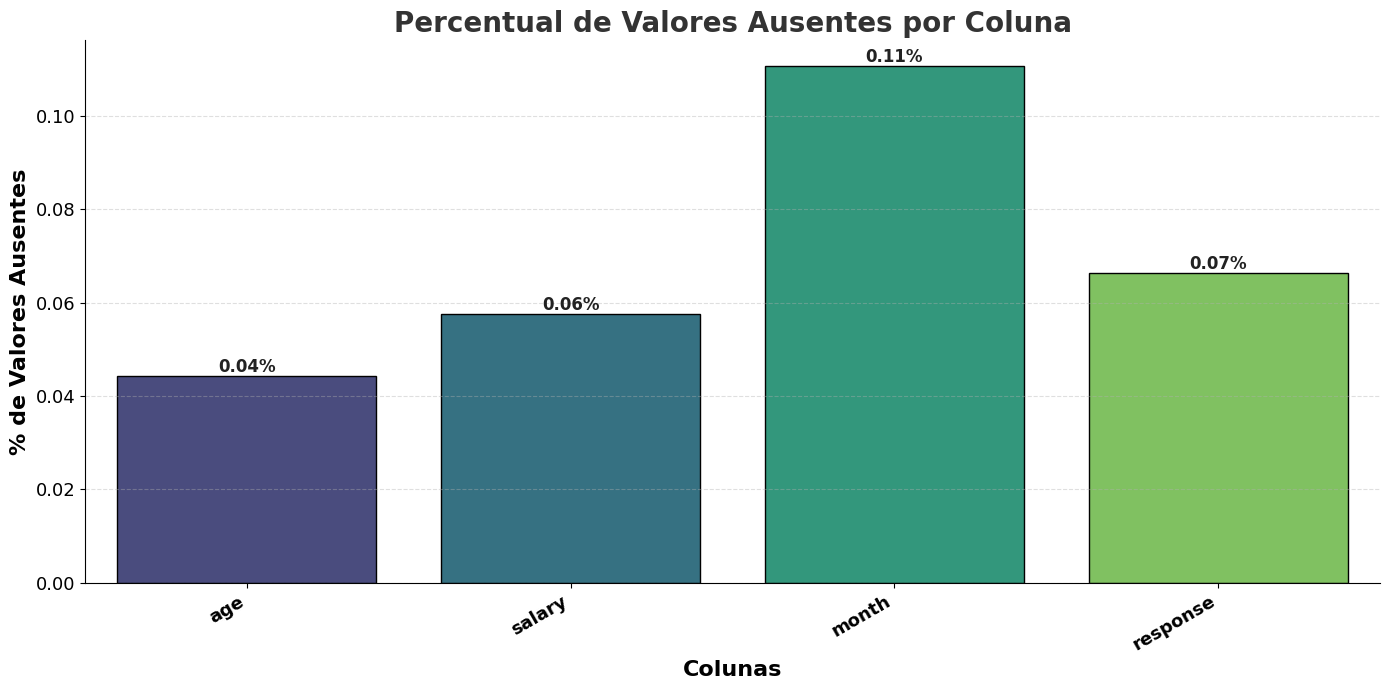

In [105]:
valores_ausentes = df.isnull().sum()
percentual_ausentes = (valores_ausentes / len(df)) * 100

df_ausentes = pd.DataFrame({
    'Valores Ausentes': valores_ausentes,
    '% de Valores Ausentes': percentual_ausentes
})
df_ausentes = df_ausentes[df_ausentes['Valores Ausentes'] > 0]

print("Colunas com valores ausentes:")
print(df_ausentes)

plt.figure(figsize=(14, 7))
cores = sns.color_palette("viridis", len(df_ausentes))
ax = sns.barplot(
    x=df_ausentes.index,
    y=df_ausentes['% de Valores Ausentes'],
    palette=cores,
    edgecolor='black'
)
plt.title('Percentual de Valores Ausentes por Coluna', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Colunas', fontsize=16, fontweight='bold')
plt.ylabel('% de Valores Ausentes', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=13, fontweight='bold')
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for p in ax.patches:
    valor = p.get_height()
    if valor > 0:
        ax.annotate(f'{valor:.2f}%', 
                    (p.get_x() + p.get_width() / 2, valor), 
                    ha='center', va='bottom', fontsize=12, color='#222222', fontweight='bold')

plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


O DataFrame apresenta um número pequeno de valores ausentes em comparação ao seu tamanho total. 
No entanto, para fins de análise e modelagem, trataremos os valores ausentes de cada variável individualmente. 

Além disso, este conjunto de dados apresenta um problema que pode passar despercebido à primeira vista; 
após o tratamento inicial, retornaremos para identificá-lo e solucioná-lo de forma adequada.

##### Month

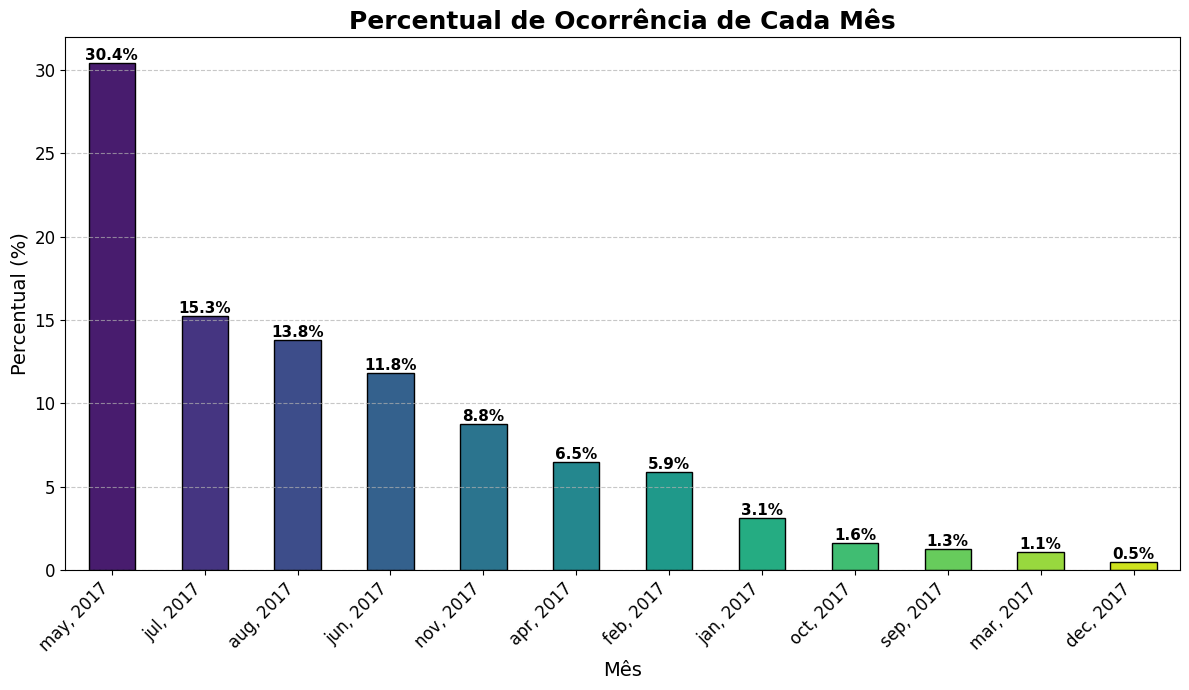

In [106]:

month_percent = df['month'].value_counts(normalize=True) * 100


plt.figure(figsize=(12,7))
cores = sns.color_palette("viridis", len(month_percent))
ax = month_percent.sort_values(ascending=False).plot(
    kind='bar', 
    color=cores, 
    edgecolor='black'
)
plt.title('Percentual de Ocorrência de Cada Mês', fontsize=18, fontweight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')
plt.tight_layout()
plt.show()


Podemos notar que a variável `month` possui em sua maioria o valor "may 2017".  
Devido ao pequeno número de valores ausentes, seria razoável preenchê-los com a moda.  

No entanto, se houvesse um número maior de valores ausentes, essa abordagem poderia alterar significativamente a distribuição da variável, aumentando excessivamente a frequência de "may 2017".  

Portanto, para fins de treino e boas práticas, optaremos por preencher os valores ausentes de acordo com a **distribuição proporcional de cada valor** na variável.

In [107]:

distribuicao_month = df['month'].value_counts(normalize=True)


indices_na = df[df['month'].isna()].index


import numpy as np
np.random.seed(42)

valores_preenchimento = np.random.choice(
    distribuicao_month.index, 
    size=len(indices_na), 
    p=distribuicao_month.values
)

df.loc[indices_na, 'month'] = valores_preenchimento


Vizualizando a proporção logo após a remoção dos valores ausentes:

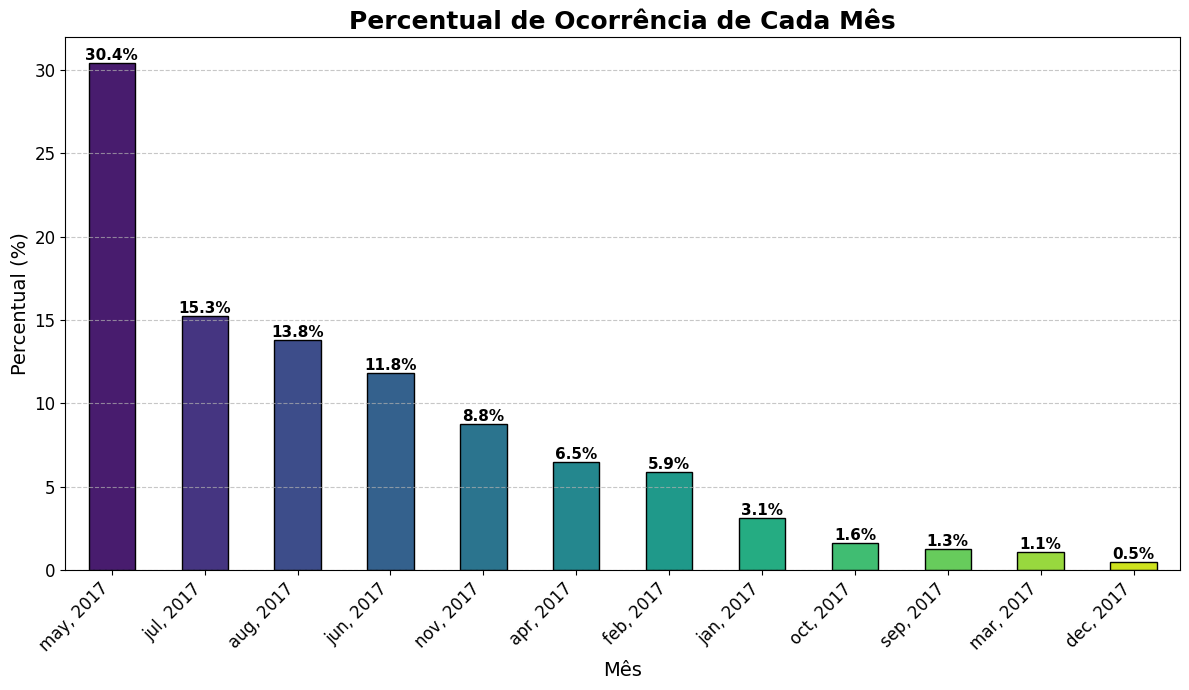

In [108]:

plt.figure(figsize=(12,7))
cores = sns.color_palette("viridis", len(month_percent))
ax = month_percent.sort_values(ascending=False).plot(
    kind='bar', 
    color=cores, 
    edgecolor='black'
)
plt.title('Percentual de Ocorrência de Cada Mês', fontsize=18, fontweight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

Veja como a distribuição da variável permanece a mesma.



##### Age e Salary

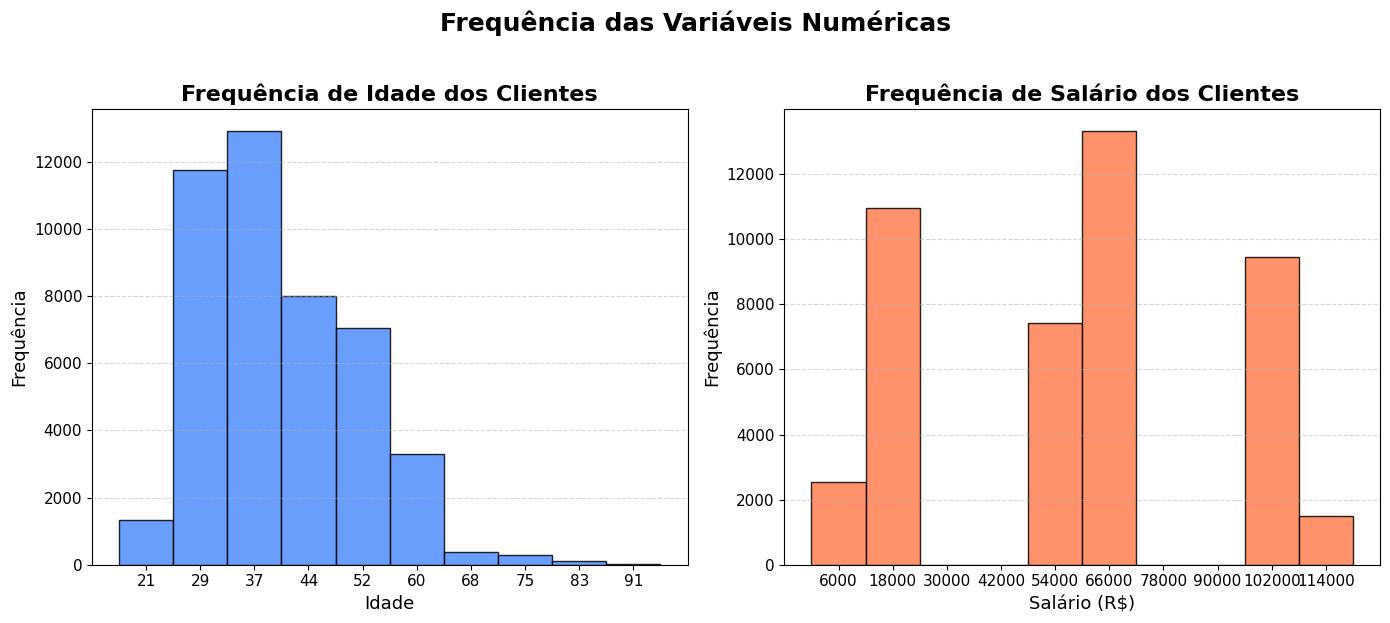

In [109]:

plt.figure(figsize=(14,6))


plt.subplot(1,2,1)
contagens_age, bins_age, patches_age = plt.hist(df['age'].dropna(), bins=10, color='#4F8DFD', edgecolor='black', alpha=0.85)
centros_age = 0.5 * (bins_age[1:] + bins_age[:-1])
plt.title('Frequência de Idade dos Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Idade', fontsize=13)
plt.ylabel('Frequência', fontsize=13)
plt.xticks(centros_age, labels=[f'{int(c)}' for c in centros_age], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.subplot(1,2,2)
contagens_salary, bins_salary, patches_salary = plt.hist(df['salary'].dropna(), bins=10, color='#FF7F50', edgecolor='black', alpha=0.85)
centros_salary = 0.5 * (bins_salary[1:] + bins_salary[:-1])
plt.title('Frequência de Salário dos Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Salário (R$)', fontsize=13)
plt.ylabel('Frequência', fontsize=13)
plt.xticks(centros_salary, labels=[f'{int(c)}' for c in centros_salary], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Frequência das Variáveis Numéricas', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()


As variáveis **Salary** e **Age**, pelo formato observado, parecem não seguir uma distribuição normal.  
Antes de tirarmos conclusões apenas pela inspeção visual, realizaremos testes formais para verificar essa hipótese.


***Mas o que é distribuição normal?***

A **distribuição normal**, também chamada de distribuição gaussiana, é uma das mais importantes em estatística.  
Ela descreve como os valores de uma variável se concentram em torno da média:

- A maior parte dos valores fica próxima da média.
- Valores extremos (muito altos ou muito baixos) ocorrem com menor frequência.

O gráfico tem formato de sino simétrico, e **média, mediana e moda coincidem**.  
Identificar se uma variável é aproximadamente normal é útil, pois muitas técnicas estatísticas clássicas, como testes de hipóteses e regressões, assumem essa condição.


Testando a normalidade das variáveis:

In [110]:
stat_age, p_age = normaltest(df['age'].dropna())
print(f"Teste de normalidade para 'age': estatística={stat_age:.4f}, p-valor={p_age:.4f}")
if p_age < 0.05:
    print("A variável 'age' NÃO segue uma distribuição normal.")
else:
    print("A variável 'age' segue uma distribuição normal.")


stat_salary, p_salary = normaltest(df['salary'].dropna())
print(f"\nTeste de normalidade para 'salary': estatística={stat_salary:.4f}, p-valor={p_salary:.4f}")
if p_salary < 0.05:
    print("A variável 'salary' NÃO segue uma distribuição normal.")
else:
    print("A variável 'salary' segue uma distribuição normal.")



Teste de normalidade para 'age': estatística=3067.3646, p-valor=0.0000
A variável 'age' NÃO segue uma distribuição normal.

Teste de normalidade para 'salary': estatística=10816.2918, p-valor=0.0000
A variável 'salary' NÃO segue uma distribuição normal.


Como ambas as variáveis não seguem uma distribuição normal, **não faz sentido utilizar a média** para preencher valores ausentes, pois ela é sensível a valores extremos e pode distorcer a distribuição dos dados.  

Duas alternativas mais apropriadas são:

- **Mediana**: o valor central quando os dados estão ordenados. É resistente a outliers e mantém a tendência central mesmo em distribuições assimétricas.  
- **Moda**: o valor mais frequente na variável. Útil quando há valores que se repetem com frequência e queremos preservar essa característica.

A escolha entre mediana e moda depende do tipo de variável e da distribuição dos dados:
- Para variáveis numéricas com valores dispersos ou assimétricos, a **mediana** costuma ser mais indicada.  

In [111]:

moda_salary = df['salary'].mode()[0]
mediana_salary = df['salary'].median()
media_salary = df['salary'].mean()
moda_age = df['age'].mode()[0]
mediana_age = df['age'].median()
media_age = df['age'].mean()


import pandas as pd

df_moda_mediana_media = pd.DataFrame({
    'Variável': ['salary', 'age'],
    'Moda': [moda_salary, moda_age],
    'Mediana': [mediana_salary, mediana_age],
    'Média': [media_salary, media_age]
})

display(df_moda_mediana_media)


,Variável,Moda,Mediana,Média
0,salary,20000.0,60000.0,57008.653314
1,age,32.0,39.0,40.935651


Observando a distribuição das variáveis:

- Para **salary**, a **moda** está muito abaixo da mediana e da média.  
  Por isso, para preencher os valores ausentes, utilizaremos a **mediana**, que melhor representa o valor central da variável e é menos sensível a valores extremos.

- Para **age**, preencher com a **moda** ou a **mediana** não faria grande diferença nos dados, pois os valores ausentes são poucos.  
  Optaremos por preencher com a **moda**, preservando os valores mais frequentes sem alterar significativamente a distribuição.


In [112]:

df['age'].fillna(moda_age, inplace=True)


df['salary'].fillna(mediana_salary, inplace=True)


##### Response

Para a variável **response**, que é a variável alvo e apresenta poucos valores ausentes, optaremos por **remover as linhas com valores ausentes**.  
Essa abordagem evita a introdução de viés ou distorções nos dados, preservando a integridade da análise.


In [113]:

df = df.dropna(subset=['response'])


#### Verificando a presença de valores nulos no dataset.

In [114]:

valores_ausentes = df.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)


Valores ausentes por coluna:
customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64


A princípio, após aplicar a linha de código anterior, o dataset parece não apresentar mais valores ausentes, sugerindo estar completamente limpo.  
No entanto, essa impressão **não é totalmente verdadeira**. Veremos a seguir o motivo.


#### Valores Unknown

In [115]:
df.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Algumas variáveis apresentam valores como `'unknown'`, que na prática representam **valores ausentes**.  
Eles podem passar despercebidos, pois o Python muitas vezes **não os reconhece automaticamente como `NaN`**.  
É importante identificar e tratar esses valores para garantir a qualidade da análise.


##### Organizando Variáveis

Primeiro, separaremos as variáveis **job** e **edu**.  
Para fins de análise e limpeza, é mais interessante **avaliar cada caso individualmente**, permitindo identificar padrões e inconsistências específicas em cada variável.


In [116]:

df[['job', 'edu']] = df['jobedu'].str.split(',', expand=True)

df.drop('jobedu', axis=1, inplace=True)


Em seguida, vamos **visualizar as variáveis que possuem valores `'unknown'`**.  
Isso nos permitirá identificar claramente onde estão os dados ausentes ocultos e planejar como tratá-los adequadamente.


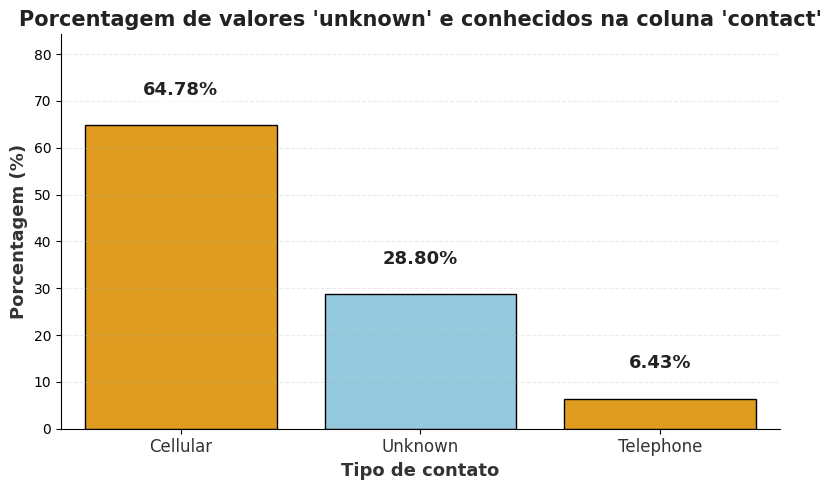

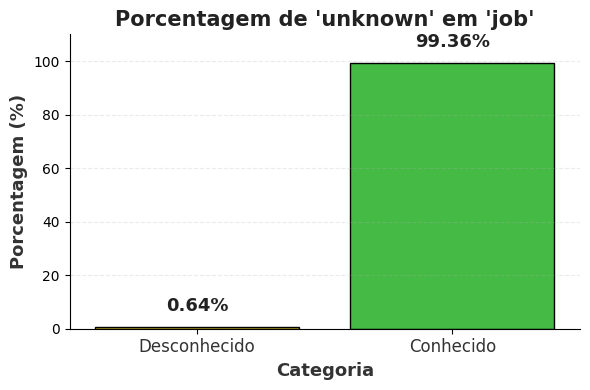

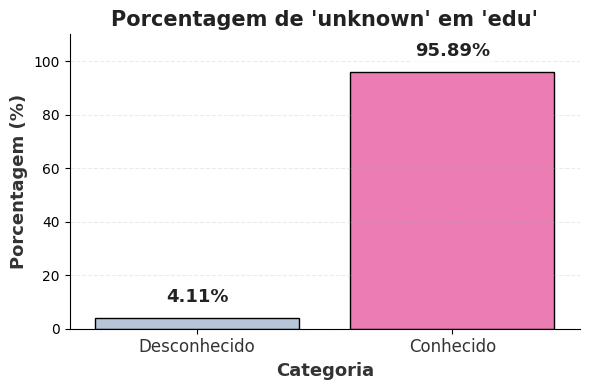

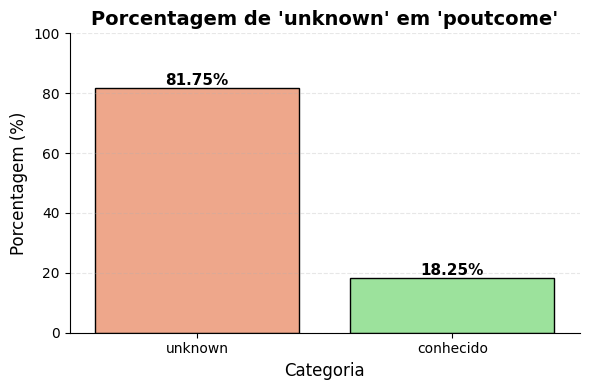

In [117]:

contagem_contact = df['contact'].str.lower().value_counts()
total = contagem_contact.sum()
porcentagens = (contagem_contact / total) * 100


fig, ax = plt.subplots(figsize=(8, 5))
barras = sns.barplot(
    x=porcentagens.index, 
    y=porcentagens.values, 
    palette=['#FFA500', '#87CEEB'],
    edgecolor='black',
    ax=ax
)
ax.set_ylabel('Porcentagem (%)', fontsize=13, fontweight='bold', color='#333333')
ax.set_xlabel('Tipo de contato', fontsize=13, fontweight='bold', color='#333333')
ax.set_title("Porcentagem de valores 'unknown' e conhecidos na coluna 'contact'", fontsize=15, fontweight='bold', color='#222222')
ax.set_ylim(0, max(porcentagens.values)*1.30)
ax.set_xticklabels([x.capitalize() for x in porcentagens.index], fontsize=12, color='#333333')
for i, v in enumerate(porcentagens.values):
    ax.text(i, v + (max(porcentagens.values)*0.10), f"{v:.2f}%", ha='center', fontsize=13, fontweight='bold', color='#222222', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


contagem_job = df['job'].str.lower().value_counts()
total_job = contagem_job.sum()
porcentagem_unknown_job = (contagem_job.get('unknown', 0) / total_job) * 100
porcentagem_conhecido_job = 100 - porcentagem_unknown_job

fig, ax2 = plt.subplots(figsize=(6, 4))
barras2 = sns.barplot(
    x=['Desconhecido', 'Conhecido'],
    y=[porcentagem_unknown_job, porcentagem_conhecido_job],
    palette=['#FFD700', '#32CD32'],
    edgecolor='black',
    ax=ax2
)
ax2.set_ylabel('Porcentagem (%)', fontsize=13, fontweight='bold', color='#333333')
ax2.set_xlabel('Categoria', fontsize=13, fontweight='bold', color='#333333')
ax2.set_title("Porcentagem de 'unknown' em 'job'", fontsize=15, fontweight='bold', color='#222222')
ax2.set_xticklabels(['Desconhecido', 'Conhecido'], fontsize=12, color='#333333')
ax2.set_ylim(0, 110)
for i, v in enumerate([porcentagem_unknown_job, porcentagem_conhecido_job]):
    ax2.text(i, v + 6, f"{v:.2f}%", ha='center', fontsize=13, fontweight='bold', color='#222222', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


contagem_edu = df['edu'].str.lower().value_counts()
total_edu = contagem_edu.sum()
porcentagem_unknown_edu = (contagem_edu.get('unknown', 0) / total_edu) * 100
porcentagem_conhecido_edu = 100 - porcentagem_unknown_edu

fig, ax3 = plt.subplots(figsize=(6, 4))
barras3 = sns.barplot(
    x=['Desconhecido', 'Conhecido'],
    y=[porcentagem_unknown_edu, porcentagem_conhecido_edu],
    palette=['#B0C4DE', '#FF69B4'],
    edgecolor='black',
    ax=ax3
)
ax3.set_ylabel('Porcentagem (%)', fontsize=13, fontweight='bold', color='#333333')
ax3.set_xlabel('Categoria', fontsize=13, fontweight='bold', color='#333333')
ax3.set_title("Porcentagem de 'unknown' em 'edu'", fontsize=15, fontweight='bold', color='#222222')
ax3.set_xticklabels(['Desconhecido', 'Conhecido'], fontsize=12, color='#333333')
ax3.set_ylim(0, 110)
for i, v in enumerate([porcentagem_unknown_edu, porcentagem_conhecido_edu]):
    ax3.text(i, v + 6, f"{v:.2f}%", ha='center', fontsize=13, fontweight='bold', color='#222222', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


contagem_poutcome = df['poutcome'].str.lower().value_counts()
total_poutcome = contagem_poutcome.sum()
porcentagem_unknown_poutcome = (contagem_poutcome.get('unknown', 0) / total_poutcome) * 100
porcentagem_conhecido_poutcome = 100 - porcentagem_unknown_poutcome

plt.figure(figsize=(6,4))
ax1 = sns.barplot(
    x=['unknown', 'conhecido'],
    y=[porcentagem_unknown_poutcome, porcentagem_conhecido_poutcome],
    palette=['#FFA07A', '#90EE90'],
    edgecolor='black'
)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xlabel('Categoria', fontsize=12)
plt.title("Porcentagem de 'unknown' em 'poutcome'", fontsize=14, fontweight='bold')
for i, v in enumerate([porcentagem_unknown_poutcome, porcentagem_conhecido_poutcome]):
    ax1.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11, fontweight='bold', color='black')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()




##### Job

As linhas em que a variável **job** apresenta valores ausentes correspondem a **menos de 1% do total**.  
Diante disso, optaremos por **remover essas linhas**, pois o impacto na análise será mínimo e a integridade dos dados será preservada.


In [118]:

df = df[df['job'].str.lower() != 'unknown']


##### Edu

Seguindo para as demais variáveis, vamos **analisar a distribuição da variável `edu`**.  
Essa visualização nos ajudará a entender a frequência dos diferentes níveis educacionais, para preencher os valores ausentes.


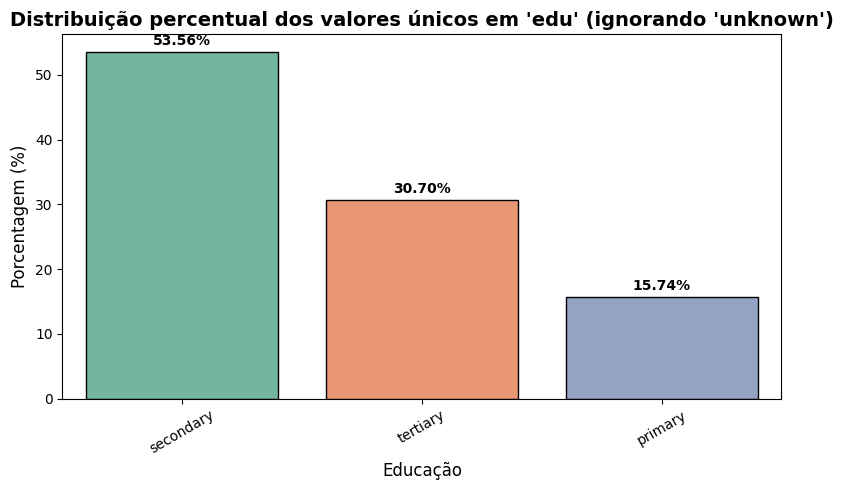

In [119]:

plt.figure(figsize=(8,5))
edu_counts = df[df['edu'].str.lower() != 'unknown']['edu'].value_counts(normalize=True) * 100
ax = sns.barplot(
    x=edu_counts.index,
    y=edu_counts.values,
    palette='Set2',
    edgecolor='black'
)
plt.title("Distribuição percentual dos valores únicos em 'edu' (ignorando 'unknown')", fontsize=14, fontweight='bold')
plt.xlabel('Educação', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
for i, v in enumerate(edu_counts.values):
    ax.annotate(f'{v:.2f}%', (i, v + 0.5), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Como o valor **'secondary'** é muito predominante na variável,  
assim como fizemos para a variável **month**, **não utilizaremos a moda** para preencher valores ausentes.  
Em vez disso, adotaremos a mesma abordagem proporcional, preenchendo os valores ausentes **de acordo com a frequência relativa de cada categoria**.  
Essa estratégia preserva a distribuição original da variável.


In [120]:

proporcoes_edu = df[df['edu'].str.lower() != 'unknown']['edu'].value_counts(normalize=True)

def preencher_edu_aleatorio(val):
    if val.lower() == 'unknown':
        return np.random.choice(proporcoes_edu.index, p=proporcoes_edu.values)
    else:
        return val

df['edu'] = df['edu'].apply(preencher_edu_aleatorio)

##### Contact

A variável **contact**, diferente das outras duas, apresenta um **grande número de valores ausentes**.  
Uma abordagem possível seria removê-la, mas antes é importante considerar seu significado: ela indica **a forma de contato com o cliente**, podendo ter **forte relação com a variável alvo `response`**.

Observa-se que a variável é **extremamente desbalanceada**.  
Para tratar isso de forma eficiente, podemos **transformá-la em uma variável binária (0 e 1)**, criando a nova coluna:

- `contacted_cellphone = 1` → cliente foi contatado por celular  
- `contacted_cellphone = 0` → cliente não foi contatado por celular  

Dessa forma, conseguimos **corrigir a variável, reduzir os efeitos de desbalanceamento e facilitar a análise de relação com a variável alvo**.



In [121]:

df['contacted_cellphone'] = df['contact'].apply(lambda x: 1 if str(x).strip().lower() == 'cellular' or str(x).strip().lower() == 'cellphone' else 0)

df = df.drop(columns=['contact'])

##### Poutcome

Para a variável **poutcome**, não há outra opção viável a não ser **removê-la**,  
pois apresenta **81% de valores ausentes**.  

Com esse nível elevado de ausência, a variável **não traz informações úteis** para a análise e sua manutenção poderia distorcer os resultados.


In [122]:

df = df.drop(columns=['poutcome'])


#### Valores ausentes "escondidos"
Algumas variáveis apresentam **valores ausentes de forma oculta**.  
Como mencionado anteriormente, valores ausentes podem aparecer de maneira simples, como `NaN`,  
mas também podem estar representados de formas **incomuns ou inesperadas**.  

Nas próximas análises, identificaremos esse caso para tratá-lo corretamente.


##### Pdays

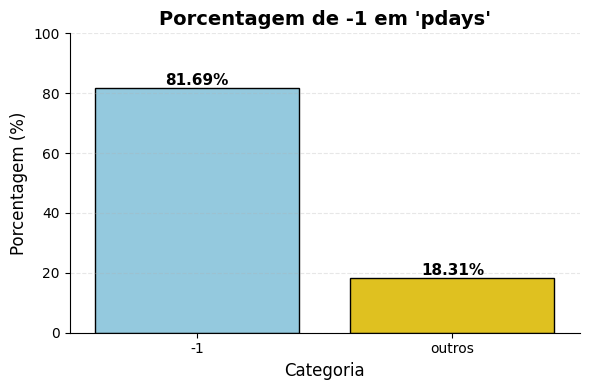

In [123]:

contagem_pdays = df['pdays'].value_counts()
total_pdays = contagem_pdays.sum()
porcentagem_menos1_pdays = (contagem_pdays.get(-1, 0) / total_pdays) * 100
porcentagem_outros_pdays = 100 - porcentagem_menos1_pdays

plt.figure(figsize=(6,4))
ax2 = sns.barplot(
    x=['-1', 'outros'],
    y=[porcentagem_menos1_pdays, porcentagem_outros_pdays],
    palette=['#87CEEB', '#FFD700'],
    edgecolor='black'
)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xlabel('Categoria', fontsize=12)
plt.title("Porcentagem de -1 em 'pdays'", fontsize=14, fontweight='bold')
for i, v in enumerate([porcentagem_menos1_pdays, porcentagem_outros_pdays]):
    ax2.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11, fontweight='bold', color='black')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

Quando **pdays = -1**, isso significa que **não houve campanha anterior** para aquele cliente.  

A partir disso, podemos concluir que: para a variável **poutcome** (já removida),  
quando `pdays` seria ausente, ela provavelmente seria `'unknown'` ou ausente.  
Ou seja, **a ausência de `pdays` implica a ausência de `poutcome`**.

**Conclusão:** os valores ausentes em ambas as variáveis provavelmente têm a **mesma causa**: o cliente **nunca participou de uma campanha anterior**.

Embora ambas as variáveis possam conter informações relevantes para a análise, o **alto número de valores ausentes** poderia enviesar qualquer estudo direto.  
No entanto, sabendo disso, **não iremos removê-las completamente**.  
Em vez disso, transformaremos a variável `pdays` em uma **variável binária**, chamada `was_p_contacted`:

- `was_p_contacted = 1` → cliente participou de uma campanha anterior  
- `was_p_contacted = 0` → cliente nunca participou de uma campanha anterior  

Dessa forma, conseguimos **preservar a informação relevante** sem que os valores ausentes prejudiquem a análise.


In [124]:
df['was_p_contacted'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)
df = df.drop(columns=['pdays'])

In [125]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,previous,response,job,edu,contacted_cellphone,was_p_contacted
0,1,58.0,100000.0,2143,married,yes,no,yes,no,5,"may, 2017",261 sec,1,0,no,management,tertiary,0,0
1,2,44.0,60000.0,29,single,yes,no,yes,no,5,"may, 2017",151 sec,1,0,no,technician,secondary,0,0
2,3,33.0,120000.0,2,married,yes,no,yes,yes,5,"may, 2017",76 sec,1,0,no,entrepreneur,secondary,0,0
3,4,47.0,20000.0,1506,married,no,no,yes,no,5,"may, 2017",92 sec,1,0,no,blue-collar,primary,0,0
5,6,35.0,100000.0,231,married,yes,no,yes,no,5,"may, 2017",139 sec,1,0,no,management,tertiary,0,0


### **Normalização**

#### Duration

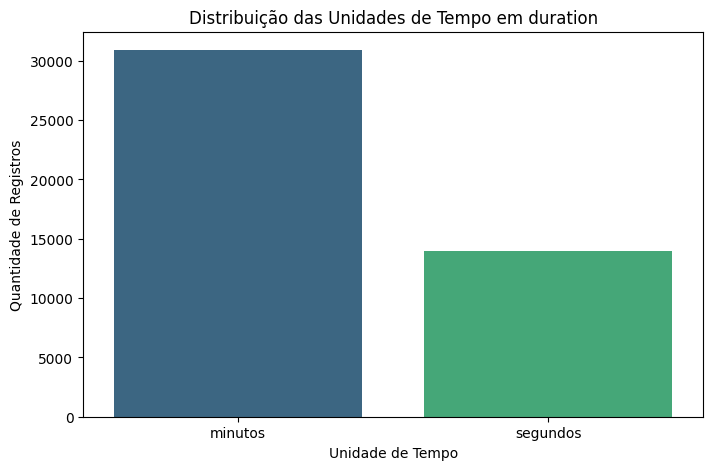

Frequência das unidades de tempo na coluna 'duration':
    Unidade  Contagem
0   minutos     30905
1  segundos     13988


In [126]:

def extrair_unidade(duration):
    if pd.isnull(duration):
        return 'desconhecido'
    duration = str(duration).lower()
    if 'sec' in duration:
        return 'segundos'
    elif 'min' in duration:
        return 'minutos'
    elif 'hour' in duration:
        return 'horas'
    else:
        return 'desconhecido'

df['duration_unidade'] = df['duration'].apply(extrair_unidade)


contagem_unidades = df['duration_unidade'].value_counts().reset_index()
contagem_unidades.columns = ['Unidade', 'Contagem']


plt.figure(figsize=(8,5))
sns.barplot(data=contagem_unidades, x='Unidade', y='Contagem', palette='viridis')
plt.title('Distribuição das Unidades de Tempo em duration')
plt.xlabel('Unidade de Tempo')
plt.ylabel('Quantidade de Registros')
plt.show()


print("Frequência das unidades de tempo na coluna 'duration':")
print(contagem_unidades)


df.drop('duration_unidade', axis=1, inplace=True)



Podemos observar que os dados da variável **duration**, que representam a duração da ligação, estão divididos entre **segundos e minutos**.  

Para fins de análise, isso não é ideal, pois dificulta a interpretação e o tratamento da variável.  
Podemos **transformar a variável em numérica** e **padronizar todas as durações em uma única unidade** (segundos ou minutos), garantindo consistência nos dados.


In [127]:

def extract_duration_sec(value):
    if isinstance(value, str) and 'sec' in value:
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return np.nan

def extract_duration_min(value):
    if isinstance(value, str) and 'min' in value:
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return np.nan

df['duration(s)'] = df['duration'].apply(extract_duration_sec)
df['duration(m)'] = df['duration'].apply(extract_duration_min)

df['duration(m)'] = df['duration(m)'] * 60

df['duration'] = df.apply(
    lambda row: row['duration(m)'] if not pd.isna(row['duration(m)']) else row['duration(s)'],
    axis=1
)
# Remover as colunas antigas
df = df.drop(columns=['duration(m)', 'duration(s)'])

Escolhemos **segundos** como unidade para a variável `duration`,  
pois é uma unidade mais **universal e precisa**.  

Caso tivéssemos escolhido **minutos**, a interpretação da variável poderia ser menos clara,  
especialmente ao lidar com durações muito curtas ou muito longas.

#### Month

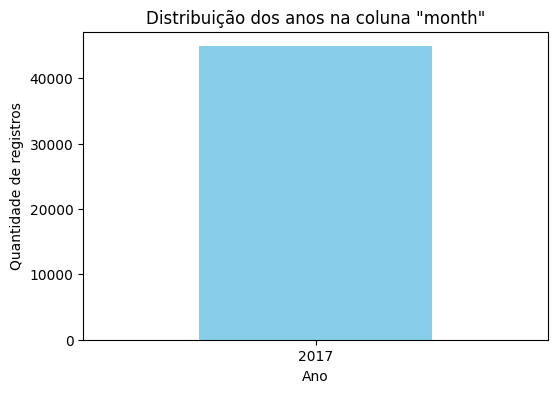

Anos únicos encontrados na coluna 'month': ['2017']


In [128]:

df['ano'] = df['month'].apply(lambda x: str(x).split(',')[-1].strip() if isinstance(x, str) and ',' in x else x)

contagem_anos = df['ano'].value_counts().sort_index()

plt.figure(figsize=(6,4))
contagem_anos.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos anos na coluna "month"')
plt.xlabel('Ano')
plt.ylabel('Quantidade de registros')
plt.xticks(rotation=0)
plt.show()

print("Anos únicos encontrados na coluna 'month':", df['ano'].unique())

df = df.drop(columns=['ano'])




A coluna **month** apresenta apenas dados do ano de 2017.  

Manter o valor "2017" após o nome dos meses **não acrescenta informação relevante** e pode **atrapalhar agrupamentos ou cálculos estatísticos**.  

Portanto, iremos **remover a parte referente ao ano**, mantendo apenas os nomes dos meses.


In [129]:

df['month'] = df['month'].apply(lambda x: str(x).split(',')[0].strip() if isinstance(x, str) and ',' in x else x)


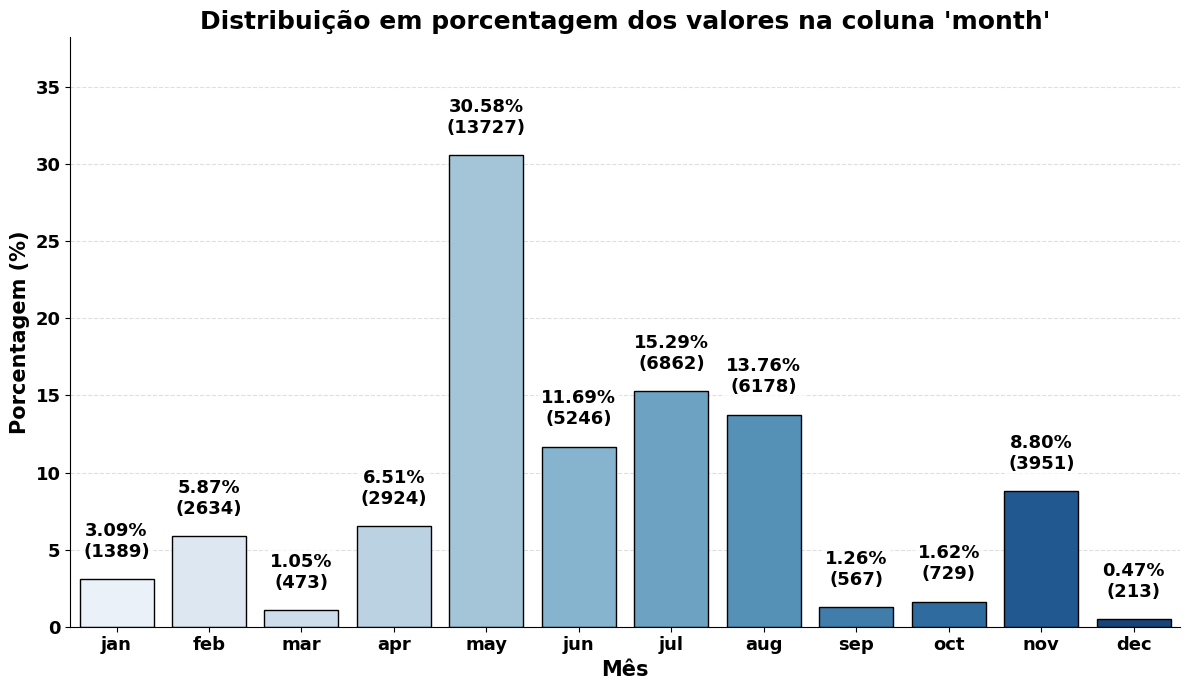

In [130]:

ordem_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


df['month'] = df['month'].str.lower()

contagem_month = df['month'].value_counts().reindex(ordem_meses).fillna(0)
porcentagem_month = (contagem_month / contagem_month.sum()) * 100

plt.figure(figsize=(12,7))  
ax = sns.barplot(
    x=contagem_month.index, 
    y=porcentagem_month.values, 
    palette='Blues', 
    edgecolor='black'
)

plt.ylabel('Porcentagem (%)', fontsize=15, fontweight='bold')
plt.xlabel('Mês', fontsize=15, fontweight='bold')
plt.title("Distribuição em porcentagem dos valores na coluna 'month'", fontsize=18, fontweight='bold')


for i, (v, n) in enumerate(zip(porcentagem_month.values, contagem_month.values)):
    ax.text(i, v + 1.2, f"{v:.2f}%\n({int(n)})", 
            ha='center', va='bottom', fontsize=13, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))


plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
ax.set_axisbelow(True)
sns.despine()
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(0, max(porcentagem_month.values)*1.25)
plt.tight_layout()
plt.show()

Além disso, a variável **month** apresenta um **desbalanceamento extremo**,  
com alguns meses possuindo menos de mil registros.  

Para melhorar o balanceamento dos dados e facilitar a análise, iremos **agrupar os meses em trimestres**.  
Dessa forma, teremos categorias mais equilibradas e uma visão mais consistente da distribuição temporal.


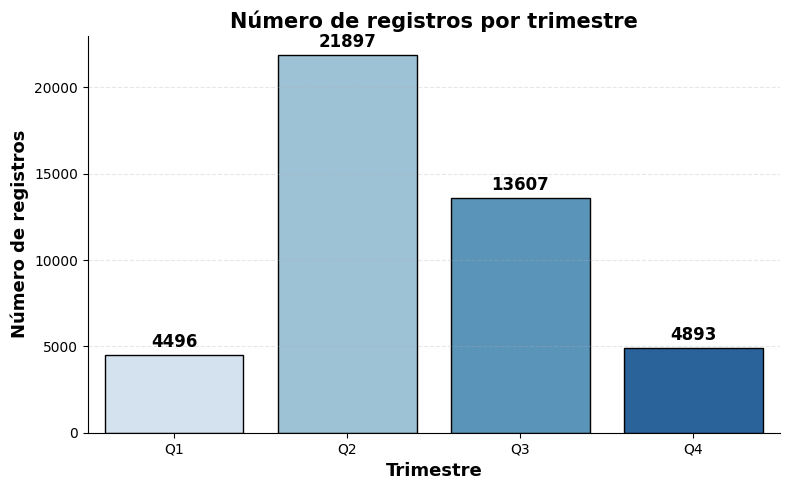

In [131]:

mapa_trimestres = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}


df['quarter'] = df['month'].map(mapa_trimestres)

contagem_quarter = df['quarter'].value_counts().sort_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=contagem_quarter.index,
    y=contagem_quarter.values,
    palette='Blues',
    edgecolor='black'
)
plt.ylabel('Número de registros', fontsize=13, fontweight='bold')
plt.xlabel('Trimestre', fontsize=13, fontweight='bold')
plt.title('Número de registros por trimestre', fontsize=15, fontweight='bold')
for i, v in enumerate(contagem_quarter.values):
    ax.text(i, v + max(contagem_quarter.values)*0.01, f"{v}", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


Mesmo após o agrupamento em trimestres, a variável ainda permanece **extremamente desbalanceada**.  

Para simplificar e melhorar o balanceamento, iremos **agrupar os meses em semestres**.  
Essa abordagem cria categorias mais equilibradas, facilitando análises e comparações estatísticas.


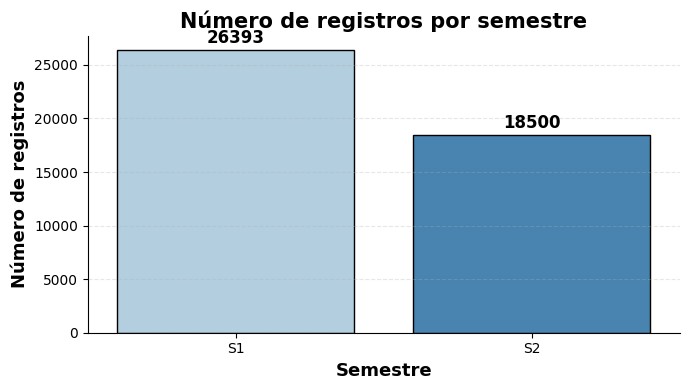

In [132]:

mapa_semestres = {
    'jan': 'S1', 'feb': 'S1', 'mar': 'S1',
    'apr': 'S1', 'may': 'S1', 'jun': 'S1',
    'jul': 'S2', 'aug': 'S2', 'sep': 'S2',
    'oct': 'S2', 'nov': 'S2', 'dec': 'S2'
}


df['semester_2017'] = df['month'].map(mapa_semestres)


contagem_semestre = df['semester_2017'].value_counts().sort_index()

plt.figure(figsize=(7,4))
ax = sns.barplot(
    x=contagem_semestre.index,
    y=contagem_semestre.values,
    palette='Blues',
    edgecolor='black'
)
plt.ylabel('Número de registros', fontsize=13, fontweight='bold')
plt.xlabel('Semestre', fontsize=13, fontweight='bold')
plt.title('Número de registros por semestre', fontsize=15, fontweight='bold')
for i, v in enumerate(contagem_semestre.values):
    ax.text(i, v + max(contagem_semestre.values)*0.01, f"{v}", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


Agora, a variável está **mais equilibrada** para análise.  

Se tivéssemos realizado a análise com os meses no formato original,  
haveria o risco de interpretar como uma **tendência real** algo que, na verdade, é apenas um reflexo do **desbalanceamento na quantidade de registros por grupo**.


In [133]:
df = df.drop(columns=['month', 'quarter'])


#### Customerid

iremos **remover a coluna `customerid`**, pois ela **não contribui para a análise** e não será utilizada nos modelos.

In [134]:
df = df.drop(columns=['customerid'])



In [135]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,day,duration,campaign,previous,response,job,edu,contacted_cellphone,was_p_contacted,semester_2017
0,58.0,100000.0,2143,married,yes,no,yes,no,5,261.0,1,0,no,management,tertiary,0,0,S1
1,44.0,60000.0,29,single,yes,no,yes,no,5,151.0,1,0,no,technician,secondary,0,0,S1
2,33.0,120000.0,2,married,yes,no,yes,yes,5,76.0,1,0,no,entrepreneur,secondary,0,0,S1
3,47.0,20000.0,1506,married,no,no,yes,no,5,92.0,1,0,no,blue-collar,primary,0,0,S1
5,35.0,100000.0,231,married,yes,no,yes,no,5,139.0,1,0,no,management,tertiary,0,0,S1


#### Binárias

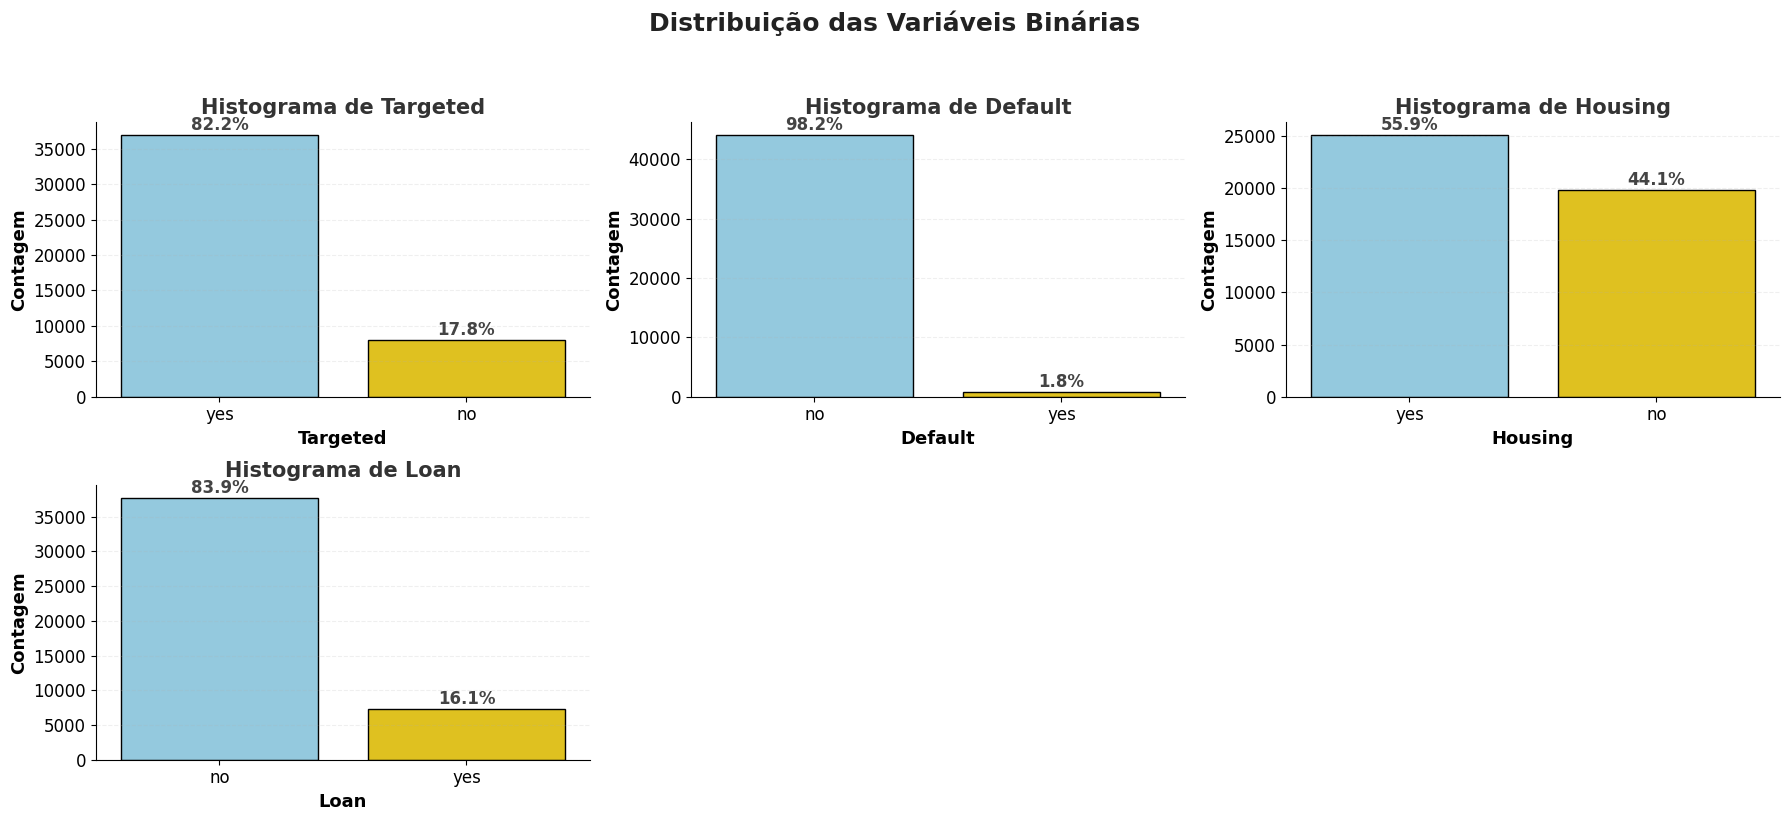

In [136]:


colunas = ['targeted', 'default', 'housing', 'loan']
cores = ['#87CEEB', '#FFD700']
plt.figure(figsize=(18, 8))
for i, coluna in enumerate(colunas, 1):
    plt.subplot(2, 3, i)
    valores = df[coluna].value_counts()
    porcentagens = df[coluna].value_counts(normalize=True) * 100

    ax = sns.barplot(
        x=valores.index, 
        y=valores.values, 
        palette=cores[:len(valores)], 
        edgecolor='black'
    )

    plt.title(f'Histograma de {coluna.capitalize()}', fontsize=15, fontweight='bold', color='#333333')
    plt.xlabel(coluna.capitalize(), fontsize=13, fontweight='bold')
    plt.ylabel('Contagem', fontsize=13, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    sns.despine()

    for j, (valor, contagem) in enumerate(valores.items()):
        pct = porcentagens[valor]
        ax.text(j, contagem + max(valores)*0.02, f'{pct:.1f}%', 
                ha='center', fontsize=12, fontweight='bold', color='#444444')
plt.suptitle('Distribuição das Variáveis Binárias', fontsize=18, fontweight='bold', color='#222222', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


Algumas variáveis apresentam **desbalanceamento significativo**,  
mas ainda assim iremos **manter aquelas em que a categoria menos frequente representa mais de 10% dos registros**,  
até termos certeza de que não possuem relação com a variável alvo.  

Para facilitar e **agilizar a análise**, essas variáveis serão **convertidas para o tipo booleano**.


In [137]:

df = df.drop(columns=['default'])


In [138]:

colunas_bool = ['targeted', 'housing', 'loan', 'response']
for coluna in colunas_bool:
    df[coluna] = df[coluna].map({'yes': 1, 'no': 0})


In [139]:
df.head()

,age,salary,balance,marital,targeted,housing,loan,day,duration,campaign,previous,response,job,edu,contacted_cellphone,was_p_contacted,semester_2017
0,58.0,100000.0,2143,married,1,1,0,5,261.0,1,0,0,management,tertiary,0,0,S1
1,44.0,60000.0,29,single,1,1,0,5,151.0,1,0,0,technician,secondary,0,0,S1
2,33.0,120000.0,2,married,1,1,1,5,76.0,1,0,0,entrepreneur,secondary,0,0,S1
3,47.0,20000.0,1506,married,0,1,0,5,92.0,1,0,0,blue-collar,primary,0,0,S1
5,35.0,100000.0,231,married,1,1,0,5,139.0,1,0,0,management,tertiary,0,0,S1


### **Verificando Valores nulos novamente**.

Após realizar as modificações nos dados, é **importante verificar se não foram gerados novos valores ausentes**.  
Essa checagem garante que a limpeza e transformação das variáveis não tenham introduzido inconsistências ou lacunas inesperadas.


In [140]:

valores_ausentes = df.isnull().sum()
print("Valores ausentes por coluna após as transformações:")
print(valores_ausentes[valores_ausentes > 0] if valores_ausentes.sum() > 0 else "Nenhum valor ausente encontrado.")


Valores ausentes por coluna após as transformações:
Nenhum valor ausente encontrado.


### **Outlier**

Once missing values and data types have been addressed, we will proceed to identify outlier values:

In [141]:

colunas_outlier = ['age', 'balance', 'campaign', 'duration', 'previous']

for coluna in colunas_outlier:

    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR


    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    qtd_outliers = outliers.shape[0]
    total = df.shape[0]
    porcentagem = (qtd_outliers / total) * 100

    print(f"Coluna: {coluna}")
    print(f"Quantidade de outliers: {qtd_outliers}")
    print(f"Porcentagem de outliers: {porcentagem:.2f}%\n")



Coluna: age
Quantidade de outliers: 480
Porcentagem de outliers: 1.07%

Coluna: balance
Quantidade de outliers: 4711
Porcentagem de outliers: 10.49%

Coluna: campaign
Quantidade de outliers: 3029
Porcentagem de outliers: 6.75%

Coluna: duration
Quantidade de outliers: 3050
Porcentagem de outliers: 6.79%

Coluna: previous
Quantidade de outliers: 8218
Porcentagem de outliers: 18.31%



 #### Observações
- As variáveis **balance**, **campaign**, **duration** e **previous** apresentam proporções de outliers consideráveis, acima de 5%.  
- O destaque vai para **previous**, com **18.31% de outliers**, o que pode impactar significativamente a análise.  
- A variável **age** possui poucos outliers (1.07%), sendo menos preocupante.    

Substituíremos os outliers pelos limites (Fences). Mas o que exatamente sãos os limites?

#### Tratamento de Outliers com Fences

Na estatística, para lidar com valores extremos utilizamos os **quartis**:

- **Quartis**: dividem os dados em quatro partes iguais.  
- O **primeiro quartil (Q1)** é o ponto onde 25% dos dados estão abaixo dele.  
- O **terceiro quartil (Q3)** é o ponto onde 75% dos dados estão abaixo dele.  
- A diferença entre esses dois pontos chama-se **intervalo interquartil (IQR)**, que mostra a “faixa normal” onde os dados costumam estar.

Com base no IQR, criamos dois **limites (fences)**:  
- **Limite inferior**: identifica valores muito baixos.  
- **Limite superior**: identifica valores muito altos.  

Todos os valores que ultrapassam esses limites são considerados **outliers**.

Em vez de simplesmente remover esses outliers, podemos **substituí-los pelos próprios limites**:  
- Se surgir um valor muito acima do esperado (ex.: 500 anos em um conjunto de idades), substituímos pelo **maior valor aceitável** dentro do limite.  
- Se surgir um valor muito abaixo do esperado (ex.: idade negativa), substituímos pelo **menor valor aceitável** dentro do limite.  

Dessa forma, mantemos todos os registros no conjunto de dados, mas sem deixar que valores extremos prejudiquem a análise.

Essa técnica é especialmente útil quando acreditamos que os outliers não representam erros, mas sim valores raros que poderiam distorcer a análise estatística.

In [142]:

colunas_replace = ['campaign', 'duration', 'balance', 'age']

for coluna in colunas_replace:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])



## 5. Análise Exploratória.

### **Correlação**

#### Correlação de Spearman

Para entendermos como as variáveis se relacionam com a variável alvo **Response**, podemos utilizar o **coeficiente de correlação de Spearman**.

Esse coeficiente mede a **força e a direção da relação monotônica** entre duas variáveis.  
Isso significa que ele não depende da relação ser exatamente linear (como no caso da correlação de Pearson), mas sim se as variáveis **tendem a crescer ou decrescer juntas**.

- Se o coeficiente for **próximo de +1**, indica que, conforme uma variável aumenta, a outra também tende a aumentar.  
- Se for **próximo de -1**, indica que, conforme uma variável aumenta, a outra tende a diminuir.  
- Se for **próximo de 0**, significa que não existe uma relação monotônica clara entre elas.

O Spearman é calculado a partir da **ordenação (ranking)** dos valores, e não diretamente dos números brutos.  
Isso o torna especialmente útil para variáveis que não seguem uma distribuição normal ou que possuem escalas diferentes.

Exemplo:

Imagine que temos 5 alunos.  
Medimos **duas coisas diferentes**: a **nota da prova** e a **colocação deles em uma competição de corrida**.

| Aluno | Nota da Prova | Colocação na Corrida |
|-------|---------------|-----------------------|
| A     | 9.5           | 1º                   |
| B     | 8.7           | 2º                   |
| C     | 7.0           | 3º                   |
| D     | 5.5           | 4º                   |
| E     | 4.0           | 5º                   |

Se observarmos, **quanto maior a nota, melhor também foi a colocação na corrida** (1º é melhor do que 5º).  
Ou seja, há uma **forte correlação de Spearman positiva**.

Agora, imagine que a tabela fosse assim:

| Aluno | Nota da Prova | Colocação na Corrida |
|-------|---------------|-----------------------|
| A     | 9.5           | 5º                   |
| B     | 8.7           | 4º                   |
| C     | 7.0           | 3º                   |
| D     | 5.5           | 2º                   |
| E     | 4.0           | 1º                   |

Neste caso, quem tirou maior nota ficou nas piores colocações da corrida.  
Isso mostra uma **correlação de Spearman negativa**.

Se as colocações fossem aleatórias, sem relação nenhuma com as notas, o resultado seria **próximo de zero**.


In [143]:


colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns


correlacao_spearman_response = df[colunas_numericas].corrwith(df['response'], method='spearman')

print("Coeficiente de Spearman entre as variáveis numéricas e a variável 'response':")
print(correlacao_spearman_response)


Coeficiente de Spearman entre as variáveis numéricas e a variável 'response':
age                   -0.008877
salary                 0.011636
balance                0.101186
targeted              -0.068917
housing               -0.140035
loan                  -0.068697
day                   -0.029804
duration               0.326767
campaign              -0.083100
previous               0.168089
response               1.000000
contacted_cellphone    0.135142
was_p_contacted        0.166191
dtype: float64


Após calcularmos o coeficiente de correlação de **Spearman** entre as variáveis numéricas e a variável `response`, encontramos os seguintes destaques:

- **`duration` (0.3267)**  
  É a variável com **maior correlação positiva** com a resposta.  
  Isso indica que **quanto maior a duração da ligação, maior a chance de resposta positiva**.  
  Faz sentido, pois uma ligação mais longa sugere **maior interesse do cliente**.

- **`previous` (0.1681), `was_p_contacted` (0.1662) e `contacted_cellphone` (0.1351)**  
  Apresentam **correlações positivas moderadas**.  
  Isso mostra que clientes **já contatados antes**, ou que foram **contatados via celular**, têm mais chance de responder positivamente.

- **`balance` (0.1012)**  
  Correlação positiva pequena. Ainda assim, sugere que **clientes com saldo maior na conta tendem a responder mais**.

- **`housing` (-0.1400)**  
  Correlação **negativa moderada**.  
  Indica que clientes com **financiamento habitacional** têm menor chance de responder positivamente.

- **Demais variáveis (`age`, `salary`, `campaign`, `loan`, `default`, `day`, `targeted`)**  
  Apresentam **coeficientes próximos de zero**, o que significa **pouca ou nenhuma relação monotônica** com a variável resposta.

---

**Conclusão:**  
Os fatores mais relevantes para prever uma resposta positiva são:  
- **Duração da ligação** (forte indício de interesse).  
- **Histórico de contato prévio** (clientes já contatados tendem a responder melhor).  
- **Canal de contato (celular)**, que se mostra mais efetivo.  
- **Situação financeira** (saldo positivo ajuda, enquanto financiamento habitacional atrapalha).  

#### Análise Gráfica I

Além de utilizar o coeficiente de Spearman para avaliar a correlação entre as variáveis e a variável alvo (`response`), também iremos **visualizar graficamente cada uma das variáveis**.  

Esse passo é importante porque, muitas vezes, a correlação numérica pode não capturar totalmente o comportamento dos dados.  
Assim, a análise gráfica nos permite **confirmar tendências, identificar padrões escondidos e evitar descartar variáveis que possam ser relevantes** para a interpretação.


##### Duration

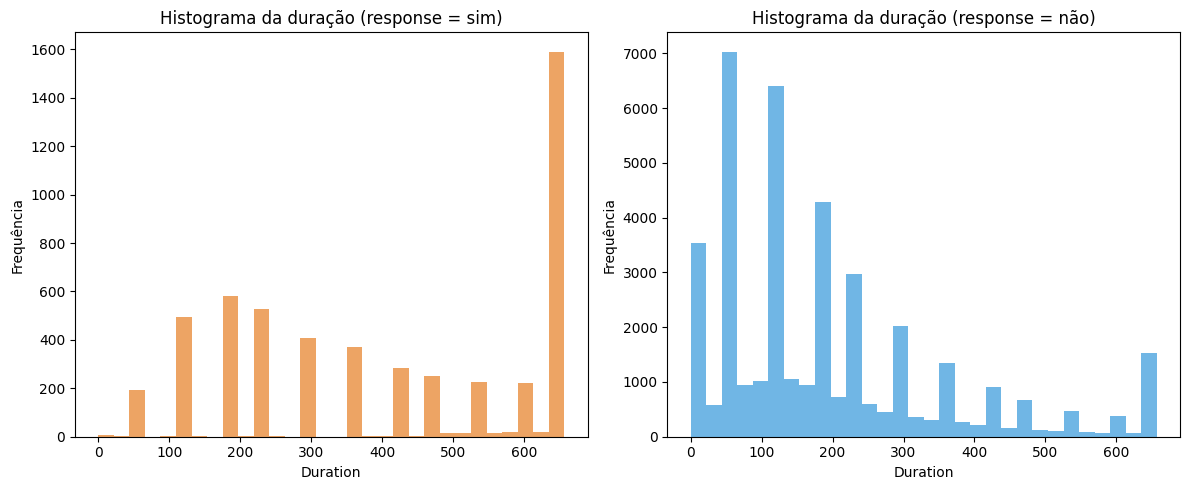

In [144]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.hist(df[df['response'] == 1]['duration'], bins=30, color='#e67e22', alpha=0.7)
plt.title('Histograma da duração (response = sim)')
plt.xlabel('Duration')
plt.ylabel('Frequência')


plt.subplot(1, 2, 2)
plt.hist(df[df['response'] == 0]['duration'], bins=30, color='#3498db', alpha=0.7)
plt.title('Histograma da duração (response = não)')
plt.xlabel('Duration')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- **Response = 1 (Sim):**
  - Observa-se uma concentração maior no último intervalo (~600 segundos).
  - A distribuição é mais uniforme ao longo do tempo do que no caso dos "não".
  - Isso indica que **ligações mais longas estão associadas a uma maior chance de conversão**. (Assim como em Spearman)

- **Response = 0 (Não):**
  - A maioria das chamadas está entre 0 e 200 segundos.
  - A distribuição é fortemente inclinada para valores baixos, refletindo chamadas curtas.
  - Mesmo entre as chamadas mais longas, a taxa de conversão permanece baixa.


##### Was_p_contacted

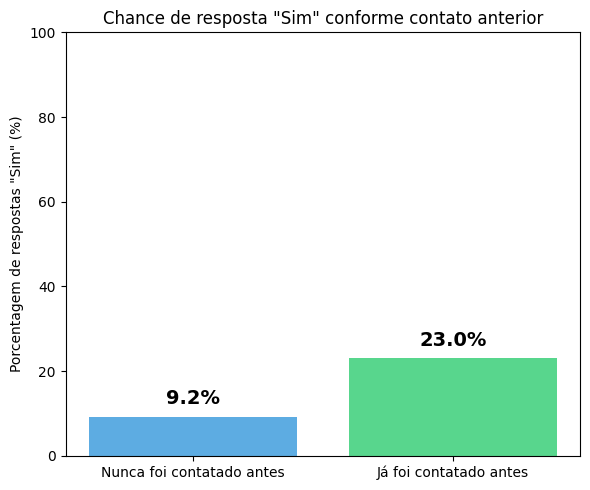

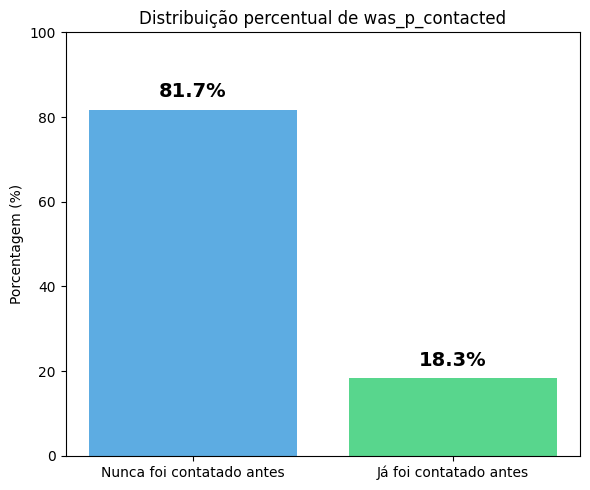

In [145]:

taxa_conversion = df.groupby('was_p_contacted')['response'].mean().reset_index()


taxa_conversion.columns = ['was_p_contatado', 'taxa_resposta_sim']


taxa_conversion['taxa_resposta_sim'] = taxa_conversion['taxa_resposta_sim'] * 100

labels = {0: 'Nunca foi contatado antes', 1: 'Já foi contatado antes'}
taxa_conversion['was_p_contatado'] = taxa_conversion['was_p_contatado'].map(labels)


plt.figure(figsize=(6,5))
plt.bar(
    taxa_conversion['was_p_contatado'],
    taxa_conversion['taxa_resposta_sim'],
    color=['#3498db', '#2ecc71'],
    alpha=0.8
)
plt.ylim(0, 100)
plt.ylabel('Porcentagem de respostas "Sim" (%)')
plt.title('Chance de resposta "Sim" conforme contato anterior')

for i, v in enumerate(taxa_conversion['taxa_resposta_sim']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

contagem = df['was_p_contacted'].value_counts(normalize=True) * 100

labels = {0: 'Nunca foi contatado antes', 1: 'Já foi contatado antes'}
contagem.index = contagem.index.map(labels)


plt.figure(figsize=(6,5))
plt.bar(contagem.index, contagem.values, color=['#3498db', '#2ecc71'], alpha=0.8)
plt.ylim(0, 100)
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição percentual de was_p_contacted')

for i, v in enumerate(contagem.values):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

- Apenas **18.3%** dos clientes haviam sido contatados anteriormente.  
- Dentro desse grupo, a taxa de resposta positiva foi de **23%**, mais que o dobro da taxa dos clientes que nunca haviam sido contatados (**9.2%**).  
- Isso mostra que **o histórico de contato está fortemente associado a uma maior chance de conversão**, mesmo representando uma parcela menor da base.

##### Balance

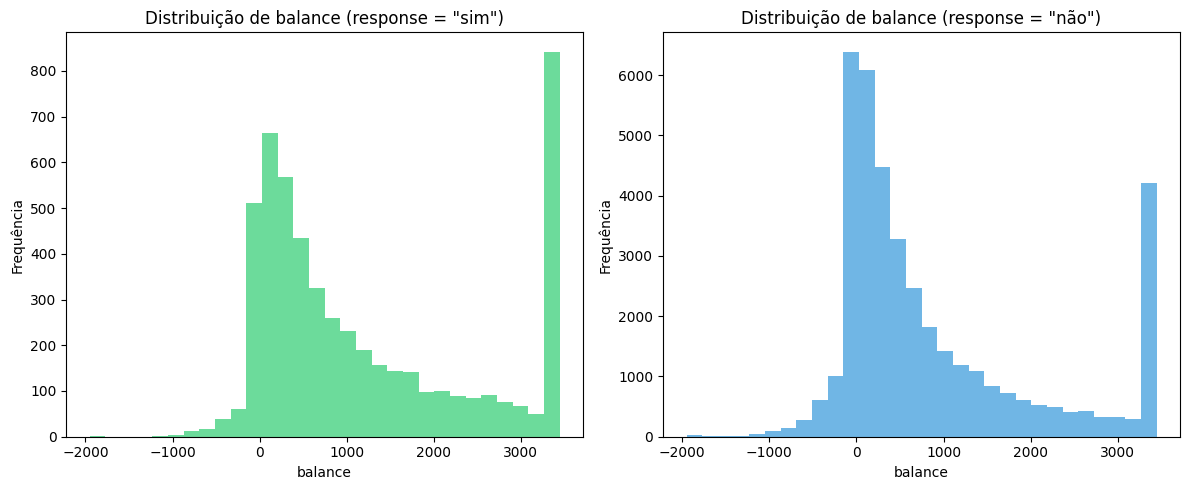

In [146]:

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.hist(df[df['response'] == 1]['balance'], bins=30, color='#2ecc71', alpha=0.7)
plt.title('Distribuição de balance (response = "sim")')
plt.xlabel('balance')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
plt.hist(df[df['response'] == 0]['balance'], bins=30, color='#3498db', alpha=0.7)
plt.title('Distribuição de balance (response = "não")')
plt.xlabel('balance')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()




- **Response = "sim" (Sim):**
  - A distribuição está mais espalhada para valores altos, indicando que **mais clientes com saldo positivo elevado aceitaram a oferta**.
  - Há um pico pronunciado no limite superior (acima de 3.000), mostrando que **clientes com saldos muito altos apresentam maior taxa de conversão**.

- **Response = "não" (Não):**
  - A maioria dos clientes está concentrada entre 0 e 1.000, com menor densidade para saldos mais altos.
  - Existe um pico no final (acima de 3.000), mas proporcionalmente menor do que no grupo do "sim".

##### Previous

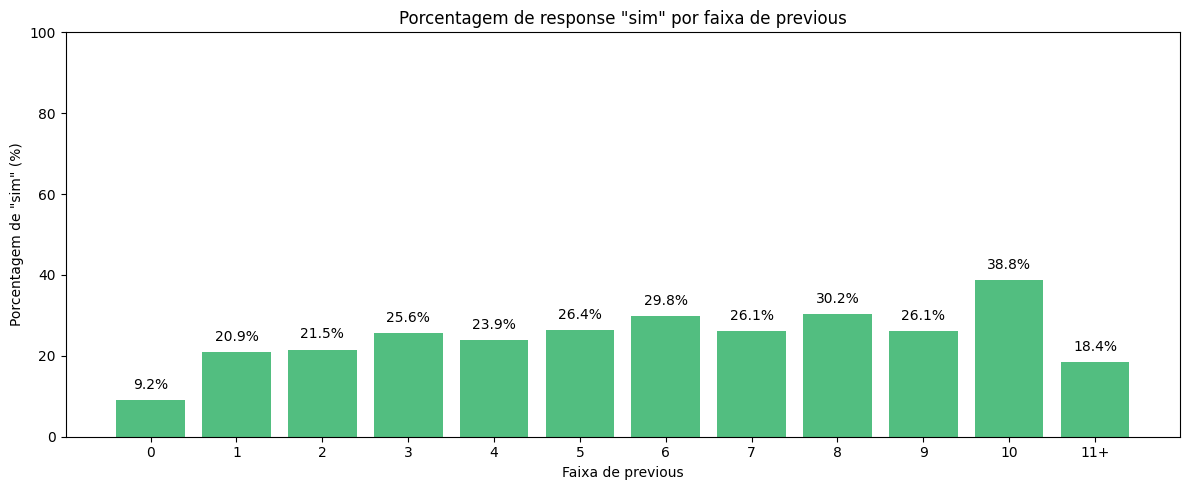

In [147]:

bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]
labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11+'
]
df['previous_group'] = pd.cut(df['previous'], bins=bins, labels=labels, right=True)


porcentagem_sim = df.groupby('previous_group')['response'].mean() * 100

plt.figure(figsize=(12,5))
bars = plt.bar(porcentagem_sim.index.astype(str), porcentagem_sim.values, color='#27ae60', alpha=0.8)
plt.ylabel('Porcentagem de "sim" (%)')
plt.xlabel('Faixa de previous')
plt.title('Porcentagem de response "sim" por faixa de previous')
plt.ylim(0, 100)


for bar, porcentagem in zip(bars, porcentagem_sim.values):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 2, 
        f'{porcentagem:.1f}%', 
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()
del df['previous_group']


- **Contato anterior aumenta a taxa de conversão:**  
  - Ter **pelo menos um contato prévio** mais que dobra a chance de aceitação, mostrando que clientes já engajados tendem a responder melhor.

- **Limite do efeito:**  
  - No grupo de **11 ou mais contatos**, observa-se uma queda na taxa de conversão.  
  - Isso sugere **saturação ou aversão à insistência**, indicando que múltiplos contatos podem ter efeito contrário.


##### Housing


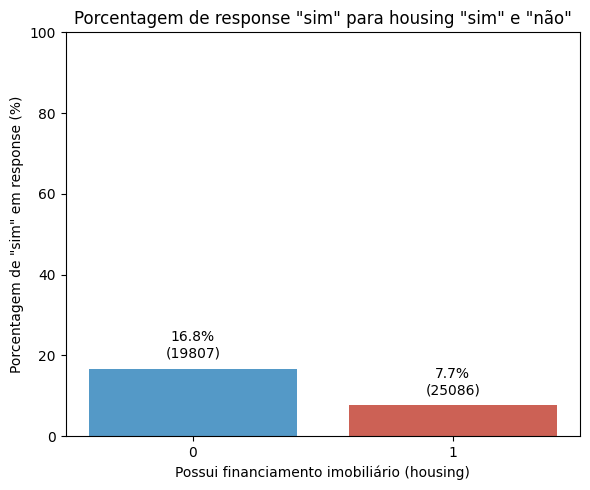

In [148]:

porcentagem_response_housing = df.groupby('housing')['response'].mean() * 100


contagem_housing = df['housing'].value_counts().sort_index()

plt.figure(figsize=(6,5))
bars = plt.bar(porcentagem_response_housing.index.astype(str), porcentagem_response_housing.values, color=['#2980b9', '#c0392b'], alpha=0.8)
plt.ylabel('Porcentagem de "sim" em response (%)')
plt.xlabel('Possui financiamento imobiliário (housing)')
plt.title('Porcentagem de response "sim" para housing "sim" e "não"')
plt.ylim(0, 100)


for bar, porcentagem, total in zip(bars, porcentagem_response_housing.values, contagem_housing.values):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 2, 
        f'{porcentagem:.1f}%\n({total})', 
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


- Clientes **sem financiamento imobiliário** têm **mais que o dobro de chance** de aceitar a proposta em comparação aos clientes com financiamento.  
- Observando os números:  
  - Sem financiamento: **16.8%** de resposta positiva
  - Com financiamento: **7.7%** de resposta positiva 
- Isso indica que possuir um **financiamento habitacional está negativamente associado à probabilidade de conversão**.

##### Contacted_cellphone

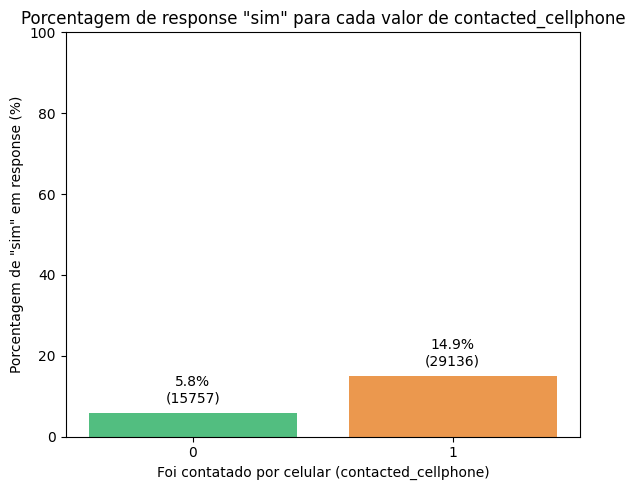

In [149]:

porcentagem_response_cell = df.groupby('contacted_cellphone')['response'].mean() * 100


contagem_cell = df['contacted_cellphone'].value_counts().sort_index()

plt.figure(figsize=(6,5))
bars = plt.bar(porcentagem_response_cell.index.astype(str), porcentagem_response_cell.values, color=['#27ae60', '#e67e22'], alpha=0.8)
plt.ylabel('Porcentagem de "sim" em response (%)')
plt.xlabel('Foi contatado por celular (contacted_cellphone)')
plt.title('Porcentagem de response "sim" para cada valor de contacted_cellphone')
plt.ylim(0, 100)

for bar, porcentagem, total in zip(bars, porcentagem_response_cell.values, contagem_cell.values):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 2, 
        f'{porcentagem:.1f}%\n({total})', 
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


- Clientes **não contatados por celular**: 5,8% de aceitação (n=15.757)  
- Clientes **contatados por celular**: 14,9% de aceitação (n=29.136)  

O contato via celular quase **triplica a chance de resposta positiva**, sendo um canal muito mais eficaz em comparação aos demais.

#### Analise Gráfica II

As variáveis analisadas apresentaram relação confirmada com a resposta do cliente, considerando o coeficiente de Spearman.  

Agora, para as demais variáveis que **não mostraram correlação significativa**, iremos realizar uma análise gráfica, a fim de termos certeza de que realmente não possuem relação relevante com a variável alvo.

##### Day, Age e Salary

Para facilitar a análise, algumas variáveis contínuas serão agrupadas em **faixas (bins)**, permitindo observar padrões que podem não ser evidentes na forma original.  

- **Day:** será transformada em intervalos de dias, possibilitando identificar se determinados períodos concentram maior taxa de conversão.  
- **Age:** será agrupada em faixas etárias, o que ajuda a verificar se a aceitação da proposta varia conforme a idade do cliente.  
- **Salary (balance):** também será organizada em faixas de valores, a fim de avaliar se a renda influencia na decisão de resposta.  

Essa abordagem torna a interpretação mais intuitiva e pode revelar relações que ficariam mascaradas pela dispersão dos dados individuais.

In [150]:


bins_salary = [0, 20000, 60000, 80000, 100000, float('inf')]
labels_salary = ['<=20k', '20k-60k', '60k-80k', '80k-100k', '100k+']
df['salary_faixa'] = pd.cut(df['salary'], bins=bins_salary, labels=labels_salary, right=True, include_lowest=True)

min_day = df['day'].min()
max_day = df['day'].max()
bins_day = list(range(int(min_day), int(max_day) + 8, 8))
labels_day = [f"{bins_day[i]} a {bins_day[i+1]}" for i in range(len(bins_day)-1)]
df['day_faixa'] = pd.cut(df['day'], bins=bins_day, labels=labels_day, include_lowest=True)

min_age = max(18, int(df['age'].min()))
max_age = int(df['age'].max())
bins_age = list(range(min_age, max_age + 15, 15))
labels_age = [f"{bins_age[i]} a {bins_age[i+1]} anos" for i in range(len(bins_age)-1)]
df['age_faixa'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, include_lowest=True)

df_faixas_final = df[['day_faixa', 'age_faixa', 'salary_faixa', 'response']].copy()

In [151]:

df_faixas_final.head()


,day_faixa,age_faixa,salary_faixa,response
0,1 a 9,48 a 63 anos,80k-100k,0
1,1 a 9,33 a 48 anos,20k-60k,0
2,1 a 9,18 a 33 anos,100k+,0
3,1 a 9,33 a 48 anos,<=20k,0
5,1 a 9,33 a 48 anos,80k-100k,0


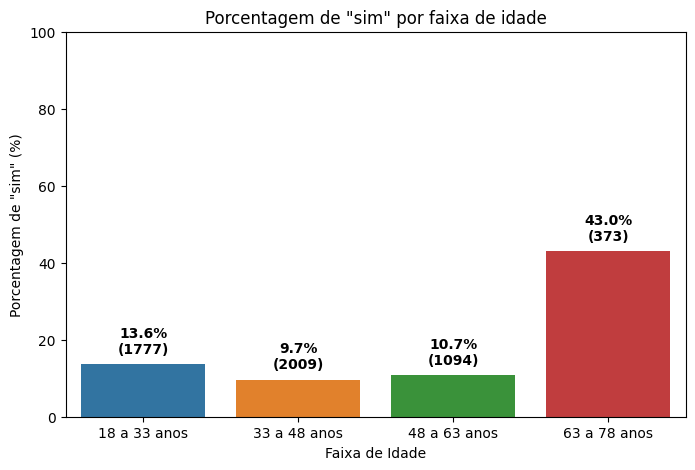

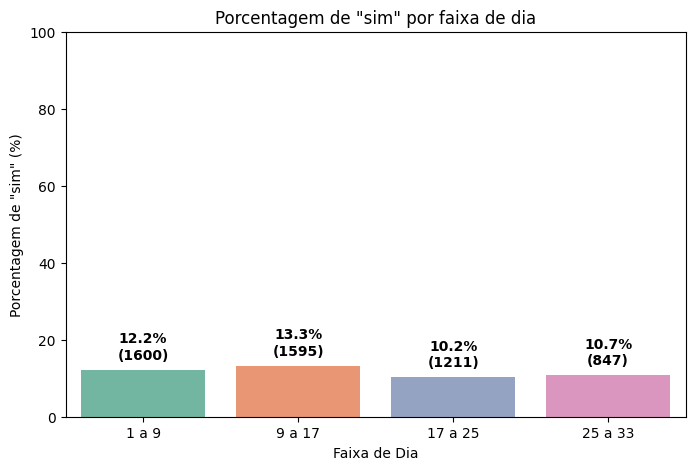

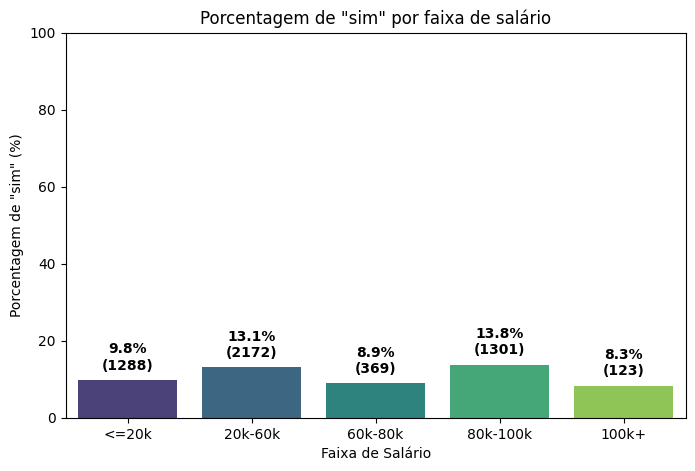

In [152]:

agrupado_idade = df_faixas_final.groupby('age_faixa')['response'].agg(['mean', 'sum', 'count'])
agrupado_idade['percent'] = agrupado_idade['mean'] * 100

plt.figure(figsize=(8,5))

ax = sns.barplot(x=agrupado_idade.index, y=agrupado_idade['percent'], palette='tab10')
plt.title('Porcentagem de "sim" por faixa de idade')
plt.ylabel('Porcentagem de "sim" (%)')
plt.xlabel('Faixa de Idade')
plt.ylim(0, 100)


for i, (percent, total_sim) in enumerate(zip(agrupado_idade['percent'], agrupado_idade['sum'])):
    ax.text(i, percent + 2, f'{percent:.1f}%\n({int(total_sim)})', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()

agrupado_dia = df_faixas_final.groupby('day_faixa')['response'].agg(['mean', 'sum', 'count'])
agrupado_dia['percent'] = agrupado_dia['mean'] * 100

plt.figure(figsize=(8,5))

ax2 = sns.barplot(x=agrupado_dia.index, y=agrupado_dia['percent'], palette='Set2')
plt.title('Porcentagem de "sim" por faixa de dia')
plt.ylabel('Porcentagem de "sim" (%)')
plt.xlabel('Faixa de Dia')
plt.ylim(0, 100)

for i, (percent, total_sim) in enumerate(zip(agrupado_dia['percent'], agrupado_dia['sum'])):
    ax2.text(i, percent + 2, f'{percent:.1f}%\n({int(total_sim)})', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


agrupado_salary = df_faixas_final.groupby('salary_faixa')['response'].agg(['mean', 'sum', 'count'])
agrupado_salary['percent'] = agrupado_salary['mean'] * 100

plt.figure(figsize=(8,5))

ax3 = sns.barplot(x=agrupado_salary.index, y=agrupado_salary['percent'], palette='viridis')
plt.title('Porcentagem de "sim" por faixa de salário')
plt.ylabel('Porcentagem de "sim" (%)')
plt.xlabel('Faixa de Salário')
plt.ylim(0, 100)


for i, (percent, total_sim) in enumerate(zip(agrupado_salary['percent'], agrupado_salary['sum'])):
    ax3.text(i, percent + 2, f'{percent:.1f}%\n({int(total_sim)})', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


Após a transformação em faixas, observamos que **Day** e **Salary** não apresentaram qualquer relação consistente com a variável resposta (`response`).  
- **Day:** ao dividir os dias em intervalos, não foi identificado um padrão de maior aceitação em períodos específicos do mês. A distribuição das respostas mostrou-se aleatória, sem concentração relevante que justificasse a utilização dessa variável para o objetivo.  
- **Salary (balance):** mesmo após o agrupamento em faixas de valores, não houve associação clara entre salários e a aceitação da proposta. Clientes com saldos mais altos ou mais baixos apresentaram taxas de resposta semelhantes, não configurando um fator determinante no comportamento observado.  

Em contrapartida, a variável **Age** apresentou um comportamento ligeiramente diferente. Apesar da maior parte das idades não mostrar correlação significativa com a resposta, foi identificado um **pequeno pico de aceitação entre clientes acima de 63 anos**. Esse indício poderia sugerir uma tendência, mas a representatividade desse grupo é extremamente baixa dentro da amostra, o que limita sua relevância estatística e impede conclusões sólidas.  

Dessa forma, podemos considerar que **Day**, **Salary** e **Age** não se mostram variáveis adequadas para contribuir com o objetivo da análise, já que não demonstram relação consistente ou significativa com a resposta final do cliente.


In [153]:

df = df.drop(columns=['age'])
df = df.drop(columns=['day'])
df = df.drop(columns=['salary'])

colunas_faixa = [col for col in df.columns if 'faixa' in col]
df = df.drop(columns=colunas_faixa)


##### Camapign e Loan


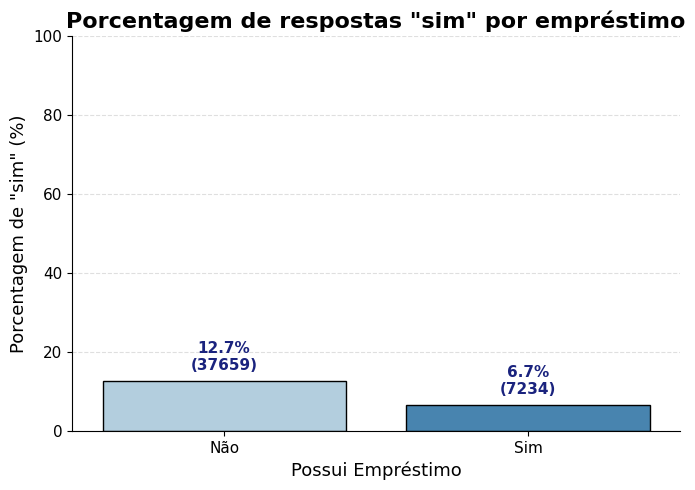

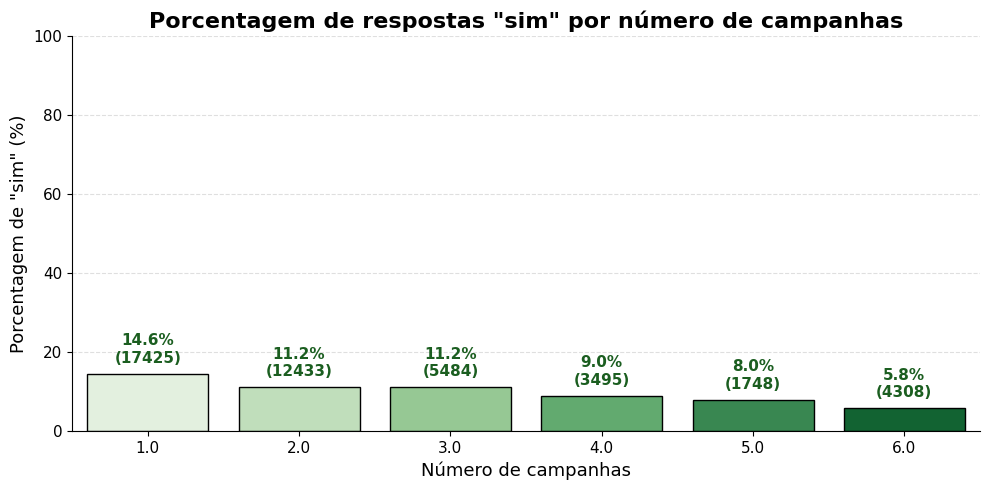

In [154]:

proporcao_sim_loan = df.groupby('loan')['response'].mean() * 100
contagem_loan = df.groupby('loan')['response'].count()

if set(proporcao_sim_loan.index) == {0, 1} or set(proporcao_sim_loan.index) == {'no', 'yes'}:
    if proporcao_sim_loan.index.dtype == 'O':
        x_labels = ['Não', 'Sim'] if 'no' in proporcao_sim_loan.index else list(proporcao_sim_loan.index)
    else:
        x_labels = ['Não', 'Sim']
else:
    x_labels = proporcao_sim_loan.index.astype(str)

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=x_labels, y=proporcao_sim_loan.values, palette='Blues', edgecolor='black')
plt.title('Porcentagem de respostas "sim" por empréstimo', fontsize=16, fontweight='bold')
plt.ylabel('Porcentagem de "sim" (%)', fontsize=13)
plt.xlabel('Possui Empréstimo', fontsize=13)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)


for i, (percent, total) in enumerate(zip(proporcao_sim_loan.values, contagem_loan.values)):
    ax.text(i, percent + 2, f'{percent:.1f}%\n({total})', ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='#1a237e')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()


proporcao_sim_campaign = df.groupby('campaign')['response'].mean() * 100
contagem_campaign = df.groupby('campaign')['response'].count()

plt.figure(figsize=(10, 5))

if all([(str(x).isdigit() and 1 <= int(x) <= 12) for x in proporcao_sim_campaign.index]):
    nomes_meses_campanha = [meses_nomes_pt[int(x)-1] for x in proporcao_sim_campaign.index]
    x_labels = nomes_meses_campanha
    xlabel = 'Mês (número de campanhas)'
else:
    x_labels = proporcao_sim_campaign.index.astype(str)
    xlabel = 'Número de campanhas'

ax2 = sns.barplot(x=x_labels, y=proporcao_sim_campaign.values, palette='Greens', edgecolor='black')
plt.title('Porcentagem de respostas "sim" por número de campanhas', fontsize=16, fontweight='bold')
plt.ylabel('Porcentagem de "sim" (%)', fontsize=13)
plt.xlabel(xlabel, fontsize=13)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax2.set_axisbelow(True)
for i, (percent, total) in enumerate(zip(proporcao_sim_campaign.values, contagem_campaign.values)):
    ax2.text(i, percent + 2, f'{percent:.1f}%\n({total})', ha='center', va='bottom', fontsize=11, fontweight='bold', color='#1b5e20')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()


Loan
- **Clientes sem empréstimo atual:** apresentaram taxa de aceitação de **12,7%**.  
- **Clientes já endividados:** apresentaram taxa de aceitação de apenas **6,7%**.  

Esse resultado sugere que o endividamento prévio é um fator de resistência importante: quem já possui um compromisso financeiro tem menor disposição para assumir um novo. Assim, a variável loan funciona como um indicador de **propensão à recusa**, teoricamente.

Campaign
O número de contatos realizados durante a campanha também mostrou um **padrão claro de retorno decrescente**:  
- Quanto mais vezes o cliente foi contatado, **menor a probabilidade de aceitar a proposta**.  
- Isso sugere fenômenos como:  
  - **Saturação:** o excesso de contatos em uma mesma campanha gera desgaste na relação;  
  - **Reforço da resistência:** cada nova tentativa mal-sucedida consolida a recusa;   

Conclusão
- **Insistência dentro de uma mesma campanha** tende a **reduzir o sucesso**.  
- **Histórico de contato em campanhas anteriores**, por outro lado, é um fator positivo, indicando maior chance de conversão.  

Portanto, os resultados reforçam que a estratégia mais eficaz não é insistir repetidamente em curto prazo, mas sim **valorizar clientes já contatados em momentos anteriores**, cultivando uma relação de confiança ao longo do tempo.  


Observando que a taxa de aceitação tende a diminuir à medida que a variável `campaign` aumenta.  
Para avaliar estatisticamente essa tendência, aplicaremos o teste de tendência de Cochran-Armitage.


O teste de Cochran-Armitage é usado quando temos duas variáveis:

1. Uma variável **binária**, que indica sucesso ou falha (por exemplo, aceitou a proposta: sim ou não).  
2. Uma variável **ordinal**, que indica uma ordem nos grupos (por exemplo, número de contatos: 1, 2, 3...).

O objetivo do teste é verificar se existe uma **tendência linear** na proporção de sucessos à medida que a variável ordinal aumenta.

Passos básicos do teste:

1. **Organização dos dados**: criamos uma tabela de contingência, com as linhas representando os grupos ordenados e as colunas representando sucesso/falha.
   
2. **Atribuição de pesos**: cada grupo ordinal recebe um peso (geralmente números consecutivos, como 1, 2, 3...).
   
3. **Cálculo da estatística de teste**:  
   A estatística mede o quanto a proporção de sucessos segue a tendência linear esperada pelos pesos. Matematicamente, ela é uma espécie de **correlação entre os pesos e as proporções de sucesso**.
   
4. **Comparação com a distribuição de referência**:  
   A estatística de teste segue aproximadamente uma distribuição **qui-quadrado** com 1 grau de liberdade. Com isso, podemos calcular o **p-valor** e decidir se a tendência é estatisticamente significativa.

Em resumo, o teste não apenas compara grupos, mas **quantifica se há uma tendência consistente de aumento ou diminuição do sucesso** ao longo de grupos ordenados.

In [155]:
dados_validos = df.loc[df['campaign'].notnull() & df['response'].notnull()]

contingencia = pd.crosstab(dados_validos['campaign'], dados_validos['response'])


if 1 not in contingencia.columns:
    contingencia[1] = 0
contingencia = contingencia.sort_index()

successos = contingencia[1].values 
total = contingencia.sum(axis=1).values 
scores = contingencia.index.values  


media_score = np.average(scores, weights=total)

p_total = successos.sum() / total.sum()


numerador = np.sum((scores - media_score) * successos)

denominador = np.sqrt(p_total * (1 - p_total) * np.sum(total * (scores - media_score) ** 2))

if denominador != 0:
    z_cochran = numerador / denominador
    from scipy.stats import norm
    p_cochran = 2 * (1 - norm.cdf(abs(z_cochran)))
    print(f"Estatística de tendência de Cochran-Armitage (Z): {z_cochran:.4f}")
    print(f"Valor-p do teste de Cochran-Armitage: {p_cochran:.4g}")
    if p_cochran < 0.05:
        print("Há evidência de tendência monotônica significativa entre campaign e resposta (p < 0.05).")
    else:
        print("Não há evidência de tendência monotônica significativa entre campaign e resposta (p >= 0.05).")
else:
    print("Não foi possível calcular o teste de Cochran-Armitage (denominador zero).")

Estatística de tendência de Cochran-Armitage (Z): -17.6790
Valor-p do teste de Cochran-Armitage: 0
Há evidência de tendência monotônica significativa entre campaign e resposta (p < 0.05).


- Estatística de tendência (Z): **-17.6790**  
- Valor-p do teste: **0**  

O resultado indica que existe **uma tendência monotônica significativa** entre `campaign` e `resposta` (p < 0.05).  

Podemos concluir que há uma **tendência negativa**, ou seja, à medida que o número de campanhas aumenta, a taxa de aceitação tende a **diminuir**, confirmando a hipótese inicial.

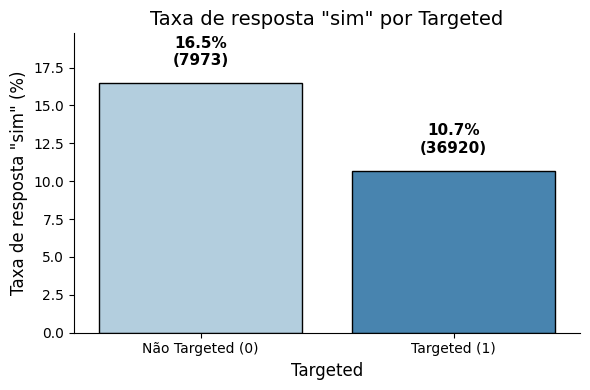

In [156]:

taxa_sim_targeted = df.groupby('targeted')['response'].mean() * 100
contagem_targeted = df['targeted'].value_counts().sort_index()

plt.figure(figsize=(6,4))
ax = sns.barplot(x=taxa_sim_targeted.index, y=taxa_sim_targeted.values, palette='Blues', edgecolor='black')
for i, (percent, total) in enumerate(zip(taxa_sim_targeted.values, contagem_targeted.values)):
    ax.text(i, percent + 1, f'{percent:.1f}%\n({total})', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_xticklabels(['Não Targeted (0)', 'Targeted (1)'])
ax.set_ylabel('Taxa de resposta "sim" (%)', fontsize=12)
ax.set_xlabel('Targeted', fontsize=12)
ax.set_title('Taxa de resposta "sim" por Targeted', fontsize=14)
plt.ylim(0, max(taxa_sim_targeted.values)*1.2)
sns.despine()
plt.tight_layout()
plt.show()


- Quem **não foi segmentado** (`Targeted = 0`) apresentou uma taxa de resposta "sim" de **16,5%**.  
- Quem **foi segmentado** (`Targeted = 1`) apresentou uma taxa de resposta "sim" de **10,7%**.  

Apesar da diferença parecer grande, **não devemos interpretá-la como uma relação forte** com a variável resposta.  
O valor estatístico indica que a variável `Targeted` **não possui associação significativa** com a resposta.

Poderíamos considerar remover a variável, mas como o coeficiente de Spearman **não é totalmente confiável para variáveis binárias**, optaremos por analisá-la junto com as variáveis categóricas.  

Essa análise será feita utilizando as métricas **Weight of Evidence (WoE)** e **Information Value (IV)**, que ajudam a medir melhor o poder explicativo de cada variável em relação à resposta.

### Correlação Woe e IV

#### Weight of Evidence (WoE) e Information Value (IV)

As métricas **WoE** e **IV** são muito usadas em análise de risco e modelagem preditiva para medir a **força da relação entre uma variável independente e a variável resposta** (geralmente binária, como "sim" ou "não").

Weight of Evidence (WoE)

O **WoE** transforma categorias ou intervalos de uma variável em valores contínuos que refletem a **proporção de bons e maus resultados** em cada grupo.

Para cada grupo \(i\) da variável:

\[
WoE_i = \ln \left( \frac{\text{Distribuição de bons no grupo } i}{\text{Distribuição de maus no grupo } i} \right)
\]

- **Bons**: casos em que a resposta é "não" (ou evento contrário de interesse).  
- **Maus**: casos em que a resposta é "sim" (ou evento de interesse).  
- O logaritmo ajuda a **linearizar a relação**, facilitando o uso em modelos como regressão logística.

Information Value (IV)

O **IV** quantifica o **poder explicativo total** de uma variável. É a soma ponderada do WoE em todos os grupos:

\[
IV = \sum_i (\text{Proporção de bons}_i - \text{Proporção de maus}_i) \times WoE_i
\]

Interpretação aproximada do IV:

- IV < 0.02 → Sem poder preditivo  
- 0.02 ≤ IV < 0.1 → Baixo poder preditivo  
- 0.1 ≤ IV < 0.3 → Médio poder preditivo  
- 0.3 ≤ IV < 0.5 → Alto poder preditivo  
- IV ≥ 0.5 → Variável muito forte ou possivelmente superajustada

Em resumo, **WoE transforma a variável em valores que mostram a força de cada grupo em relação ao evento**, enquanto o **IV mede a importância geral da variável**.


In [157]:

def calcular_woe_iv(df, feature, target):
    """
    Calcula o WOE e IV para uma variável categórica ou binária em relação ao target binário.
    Retorna um DataFrame com os valores de WOE e IV por categoria e o IV total.
    """
    eps = 1e-10  # Para evitar divisão por zero
    df_temp = df[[feature, target]].copy()
    total_event = (df_temp[target] == 1).sum()
    total_non_event = (df_temp[target] == 0).sum()
    agrupado = df_temp.groupby(feature)[target].agg(['count', 'sum'])
    agrupado = agrupado.rename(columns={'count': 'total', 'sum': 'event'})
    agrupado['non_event'] = agrupado['total'] - agrupado['event']
    agrupado['perc_event'] = agrupado['event'] / (total_event + eps)
    agrupado['perc_non_event'] = agrupado['non_event'] / (total_non_event + eps)
    agrupado['woe'] = np.log((agrupado['perc_event'] + eps) / (agrupado['perc_non_event'] + eps))
    agrupado['iv'] = (agrupado['perc_event'] - agrupado['perc_non_event']) * agrupado['woe']
    iv_total = agrupado['iv'].sum()
    return agrupado[['woe', 'iv']], iv_total


colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
if 'response' in colunas_categoricas:
    colunas_categoricas.remove('response')

if 'age_group' in df.columns and 'age_group' not in colunas_categoricas:
    colunas_categoricas.append('age_group')


colunas_binarias = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'response' and df[col].nunique() == 2:
        colunas_binarias.append(col)


colunas_woe_iv = colunas_categoricas + colunas_binarias

print("Análise de WOE e IV para variáveis categóricas e binárias em relação à variável resposta:\n")
for col in colunas_woe_iv:
    print(f"Variável: {col}")
    woe_iv_df, iv_total = calcular_woe_iv(df, col, 'response')
    print(woe_iv_df)
    print(f"IV total para {col}: {iv_total:.4f}\n")
    if iv_total < 0.02:
        interpretacao = "Sem poder preditivo"
    elif iv_total < 0.1:
        interpretacao = "Poder preditivo fraco"
    elif iv_total < 0.3:
        interpretacao = "Poder preditivo médio"
    elif iv_total < 0.5:
        interpretacao = "Poder preditivo forte"
    else:
        interpretacao = "Poder preditivo suspeito ou variável pode estar superajustada"
    print(f"Interpretação do IV: {interpretacao}\n{'-'*50}\n")


Análise de WOE e IV para variáveis categóricas e binárias em relação à variável resposta:

Variável: marital
               woe        iv
marital                     
divorced  0.025978  0.000079
married  -0.162348  0.014889
single    0.281433  0.024957
IV total para marital: 0.0399

Interpretação do IV: Poder preditivo fraco
--------------------------------------------------

Variável: job
                    woe        iv
job                              
admin.         0.046958  0.000258
blue-collar   -0.523605  0.048561
entrepreneur  -0.384220  0.004215
housemaid     -0.317586  0.002463
management     0.185787  0.007802
retired        0.801491  0.043407
self-employed  0.010447  0.000004
services      -0.305908  0.007690
student        1.109967  0.038107
technician    -0.063153  0.000658
unemployed     0.325333  0.003474
IV total para job: 0.1566

Interpretação do IV: Poder preditivo médio
--------------------------------------------------

Variável: edu
                woe        i

Antes de analisar as variáveis categóricas, vamos avaliar as variáveis binárias com base no seu poder preditivo e balanceamento.

- **Targeted**  
  A variável apresenta **fraco poder preditivo** e é muito desbalanceada. Como não atinge pelo menos um poder preditivo médio, será **removida**.

- **Loan**  
  Apesar de mostrar uma certa tendência (maior resposta "sim" para quem não possui empréstimos), a variável é **desbalanceada** e possui **baixo valor estatístico**. Portanto, será **removida**.

- **Housing**  
  Apresenta **poder preditivo médio** (WoE/IV) e bom valor em Spearman, além de não ser desbalanceada. Portanto, será **mantida**.

- **Was_p_contacted**  
  Apesar de ser bastante desbalanceada, possui **poder preditivo médio** em WoE/IV e **alto em Spearman**. Será **mantida**.

- **Contacted_cellphone**  
  É **balanceada** e apresenta **poder preditivo médio**. Será **mantida**.

In [158]:

df = df.drop(columns=['targeted', 'loan'])


##### Contact_cellphone

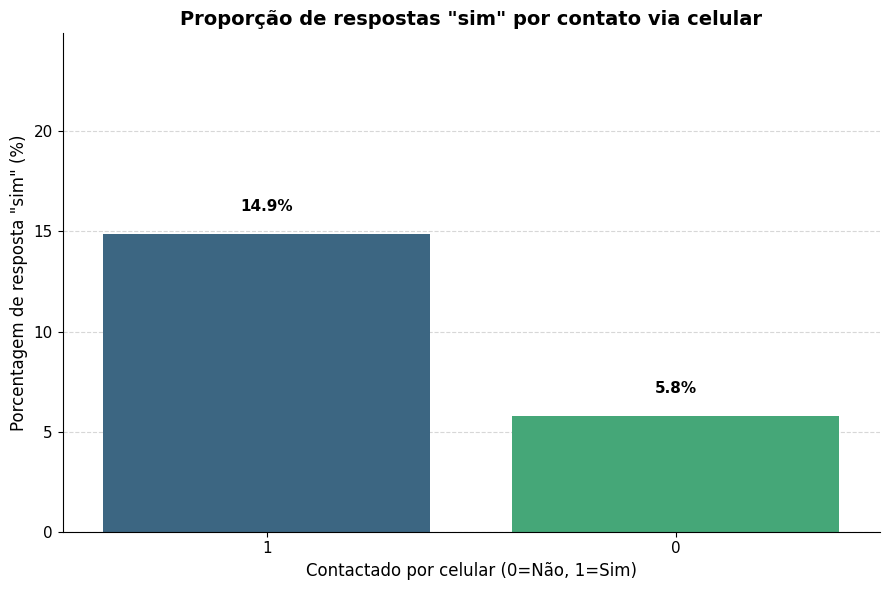

In [159]:

proporcao_sim_contacted = df.groupby('contacted_cellphone')['response'].mean().reset_index()
proporcao_sim_contacted['response'] = proporcao_sim_contacted['response'] * 100 


ordem_contacted = proporcao_sim_contacted.sort_values('response', ascending=False)['contacted_cellphone']

plt.figure(figsize=(9,6))
ax = sns.barplot(
    data=proporcao_sim_contacted, 
    x='contacted_cellphone', 
    y='response', 
    palette='viridis', 
    order=ordem_contacted
)


ax.set_ylabel('Porcentagem de resposta "sim" (%)', fontsize=12)
ax.set_xlabel('Contactado por celular (0=Não, 1=Sim)', fontsize=12)
ax.set_title('Proporção de respostas "sim" por contato via celular', fontsize=14, fontweight='bold')
ax.set_ylim(0, proporcao_sim_contacted['response'].max() + 10)


for i, row in proporcao_sim_contacted.set_index('contacted_cellphone').loc[ordem_contacted].reset_index().iterrows():
    ax.text(i, row['response'] + 1, f"{row['response']:.1f}%", ha='center', va='bottom', fontsize=11, fontweight='bold')

sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


- **Information Value (IV):** 0.2099 → **Relevante**  

| Categoria       | WoE       | Proporção de Resposta | Interpretação                       |
|-----------------|-----------|--------------------|------------------------------------|
| Cellphone       | -0.767576 | 0.154025           | Maior chance de resposta negativa  |
| No Cellphone    | 0.278231  | 0.055831           | Maior chance de resposta positiva  |

Conforme observado, **o contato via celular se mostra a estratégia mais eficaz** para gerar respostas positivas.


##### Job

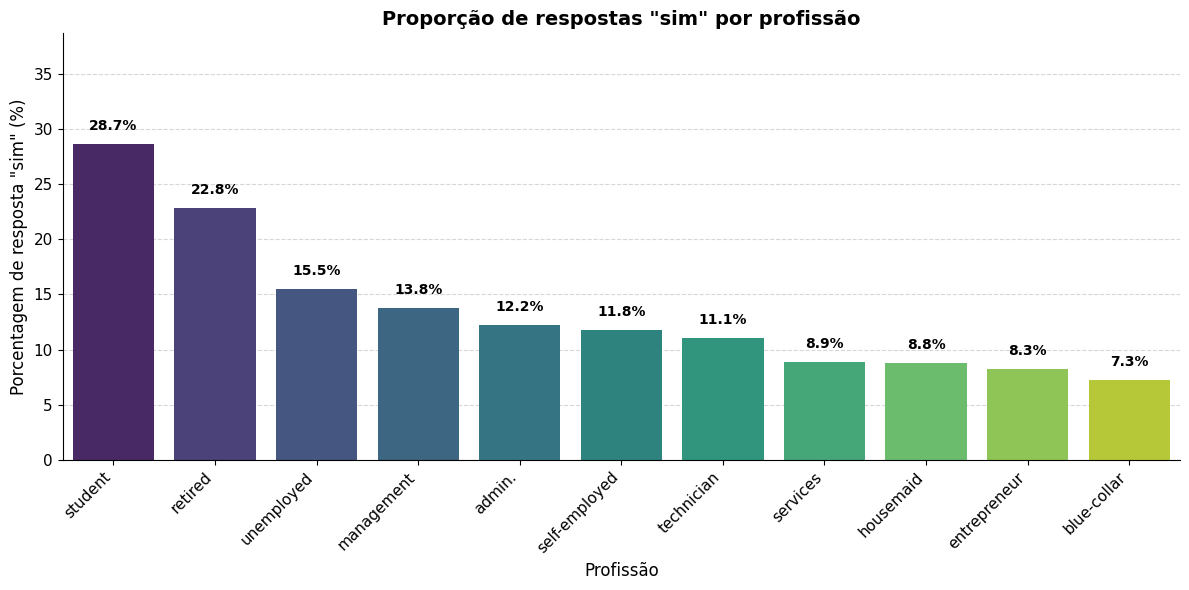

In [160]:

proporcao_sim_job = df.groupby('job')['response'].mean().reset_index()
proporcao_sim_job['response'] = proporcao_sim_job['response'] * 100 

ordem_job = proporcao_sim_job.sort_values('response', ascending=False)['job']

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=proporcao_sim_job, 
    x='job', 
    y='response', 
    palette='viridis', 
    order=ordem_job
)

ax.set_ylabel('Porcentagem de resposta "sim" (%)', fontsize=12)
ax.set_xlabel('Profissão', fontsize=12)
ax.set_title('Proporção de respostas "sim" por profissão', fontsize=14, fontweight='bold')
ax.set_ylim(0, proporcao_sim_job['response'].max() + 10)


for i, row in proporcao_sim_job.set_index('job').loc[ordem_job].reset_index().iterrows():
    ax.text(i, row['response'] + 1, f"{row['response']:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


- **Information Value (IV):** 0.1566 → **Moderadamente relevante**  

| Categoria     | WoE     | Interpretação                       |
|---------------|---------|------------------------------------|
| student       | 1.110   | Altamente propenso a aceitar       |
| retired       | 0.801   | Forte propensão a aceitar          |
| blue-collar   | -0.524  | Forte propensão a recusar          |
| housemaid     | -0.318  | Recusa mais provável               |
| management    | 0.186   | Leve propensão positiva            |

- Estudantes e aposentados apresentam **forte inclinação à resposta positiva**.  
- Perfis operacionais (blue-collar e housemaid) têm **maior propensão à recusa**.  

A variável `job` apresenta **bom valor estatístico** e diferenças claras nas respostas "sim" entre as categorias.


##### Marital

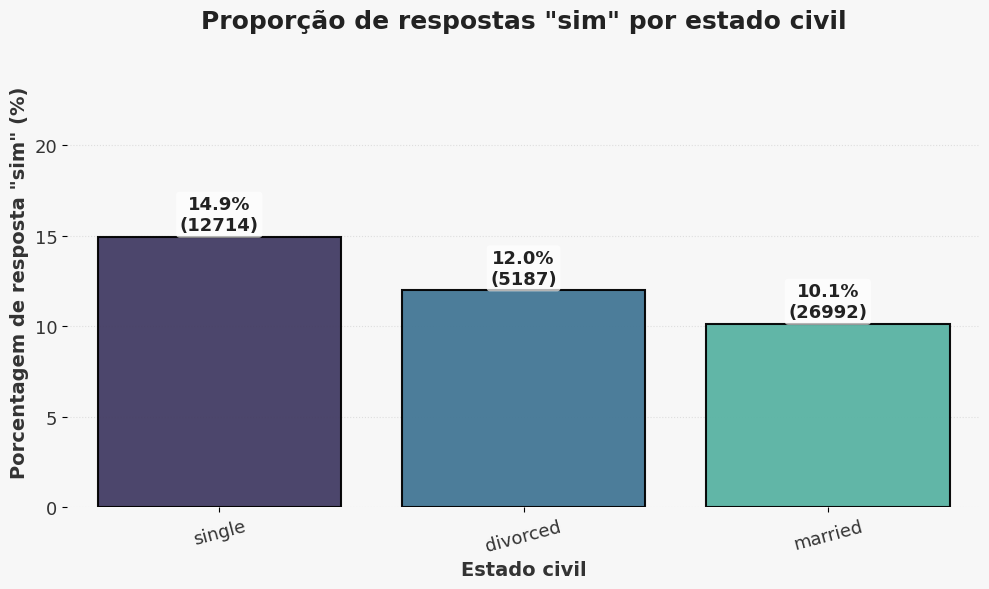

In [161]:

proporcao_sim_marital = df.groupby('marital')['response'].mean() * 100
contagem_marital = df['marital'].value_counts().reset_index()
contagem_marital.columns = ['marital', 'count']
proporcao_sim_marital = proporcao_sim_marital.reset_index().sort_values(by='response', ascending=False)
proporcao_sim_marital = proporcao_sim_marital.merge(contagem_marital, on='marital', how='left')


cores = sns.color_palette("mako", len(proporcao_sim_marital))

fig, ax = plt.subplots(figsize=(10, 6), facecolor='#f7f7f7')
barras = sns.barplot(
    data=proporcao_sim_marital,
    x='marital',
    y='response',
    palette=cores,
    ax=ax
)


for i, bar in enumerate(ax.patches):
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    bar.set_alpha(0.95)

ax.set_ylabel('Porcentagem de resposta "sim" (%)', fontsize=14, fontweight='bold', color='#333333')
ax.set_xlabel('Estado civil', fontsize=14, fontweight='bold', color='#333333')
ax.set_title('Proporção de respostas "sim" por estado civil', fontsize=18, fontweight='bold', color='#222222', pad=20)
ax.set_ylim(0, proporcao_sim_marital['response'].max() + 10)

for i, bar in enumerate(ax.patches):
    altura = bar.get_height()
    n_valores = proporcao_sim_marital.iloc[i]['count']
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        altura + (proporcao_sim_marital['response'].max() * 0.01), 
        f"{altura:.1f}%\n({n_valores})", 
        ha='center', va='bottom', fontsize=13, fontweight='bold', color='#222222',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.7)
    )


sns.despine(left=True, bottom=True)
ax.grid(axis='y', linestyle=':', alpha=0.35, zorder=0)
ax.set_axisbelow(True)
plt.xticks(rotation=15, fontsize=13, color='#333333')
plt.yticks(fontsize=13, color='#333333')
ax.set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()


- **Information Value (IV):** 0.0399 → **Fraco**  

| Categoria | WoE     | Interpretação                   |
|-----------|---------|--------------------------------|
| single    | 0.281   | Mais propenso a aceitar        |
| married   | -0.162  | Leve propensão à recusa        |
| divorced  | 0.026   | Neutro / leve tendência positiva |

- Pessoas solteiras apresentam **maior receptividade** à proposta, mas a diferença não é suficientemente forte.  
- O valor estatístico baixo indica **poder preditivo fraco**.

Portanto, apesar de `marital` poder agregar algum valor em conjunto com outras variáveis, **não é útil isoladamente** e será **removida**.


In [162]:

df = df.drop(columns=['marital'])


##### Edu

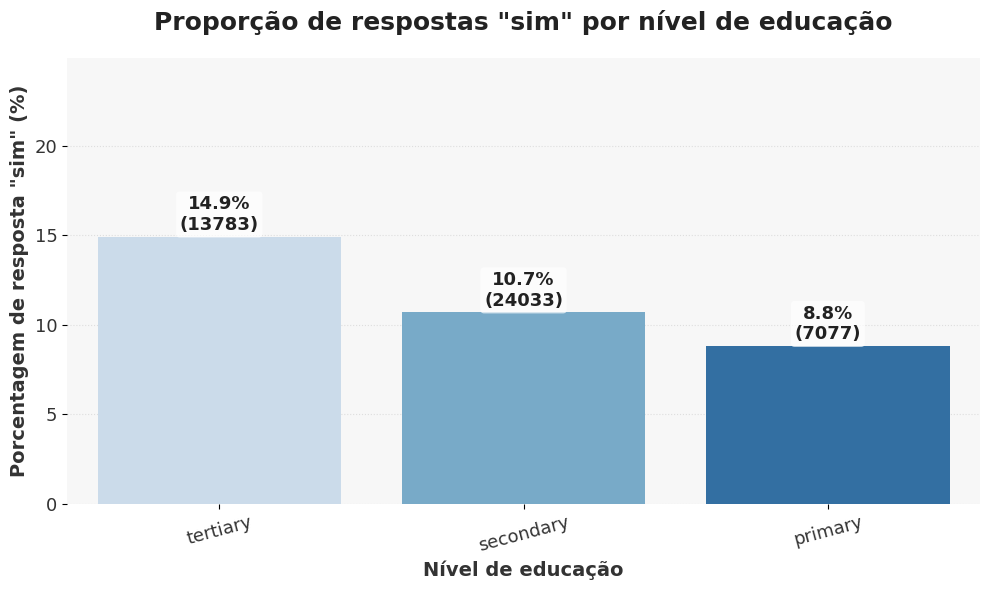

In [163]:

proporcao_sim_edu = df.groupby('edu')['response'].agg(['mean', 'count'])
proporcao_sim_edu['response'] = proporcao_sim_edu['mean'] * 100
proporcao_sim_edu = proporcao_sim_edu.reset_index()
proporcao_sim_edu = proporcao_sim_edu.sort_values(by='response', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=proporcao_sim_edu, x='edu', y='response', palette='Blues')


ax.set_ylabel('Porcentagem de resposta "sim" (%)', fontsize=14, fontweight='bold', color='#333333')
ax.set_xlabel('Nível de educação', fontsize=14, fontweight='bold', color='#333333')
ax.set_title('Proporção de respostas "sim" por nível de educação', fontsize=18, fontweight='bold', color='#222222', pad=20)
ax.set_ylim(0, proporcao_sim_edu['response'].max() + 10)

for i, bar in enumerate(ax.patches):
    altura = bar.get_height()
    n_valores = proporcao_sim_edu.iloc[i]['count']
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        altura + (proporcao_sim_edu['response'].max() * 0.01), 
        f"{altura:.1f}%\n({n_valores})", 
        ha='center', va='bottom', fontsize=13, fontweight='bold', color='#222222',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.7)
    )

sns.despine(left=True, bottom=True)
ax.grid(axis='y', linestyle=':', alpha=0.35, zorder=0)
ax.set_axisbelow(True)
plt.xticks(rotation=15, fontsize=13, color='#333333')
plt.yticks(fontsize=13, color='#333333')
ax.set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()


- **Information Value (IV):** 0.0463 → **Fraco**  

| Categoria  | WoE     | Interpretação                   |
|------------|---------|--------------------------------|
| tertiary   | 0.282   | Mais propenso a aceitar        |
| primary    | -0.315  | Menos propenso                 |
| secondary  | -0.101  | Leve tendência à recusa        |

- Observa-se que **maior escolaridade tende a estar relacionada à aceitação da oferta**.  
- Apesar do poder preditivo ser fraco, a variável apresenta **alguma relação com a variável alvo**.

Podemos considerá-la como uma **variável ordinal** e aplicar o **teste de tendência de Cochran-Armitage** para investigar melhor essa relação.


In [164]:

mapeamento_edu = {'primary': 1, 'secondary': 2, 'tertiary': 3}
df['edu_num'] = df['edu'].map(mapeamento_edu)


dados_validos = df.loc[df['edu_num'].notnull() & df['response'].notnull()]


contingencia = pd.crosstab(dados_validos['edu_num'], dados_validos['response'])


successos = contingencia[1].values 
total = contingencia.sum(axis=1).values 
scores = contingencia.index.values 

media_score = np.average(scores, weights=total)

p_total = successos.sum() / total.sum()

numerador = np.sum((scores - media_score) * successos)

denominador = np.sqrt(p_total * (1 - p_total) * np.sum(total * (scores - media_score) ** 2))


if denominador != 0:
    z_cochran = numerador / denominador
    from scipy.stats import norm
    p_cochran = 2 * (1 - norm.cdf(abs(z_cochran)))
    print(f"Estatística de tendência de Cochran-Armitage (Z): {z_cochran:.4f}")
    print(f"Valor-p do teste de Cochran-Armitage: {p_cochran:.4g}")
    if p_cochran < 0.05:
        print("Há evidência de tendência monotônica significativa entre escolaridade e resposta (p < 0.05).")
    else:
        print("Não há evidência de tendência monotônica significativa entre escolaridade e resposta (p >= 0.05).")
else:
    print("Não foi possível calcular o teste de Cochran-Armitage (denominador zero).")


Estatística de tendência de Cochran-Armitage (Z): 14.3570
Valor-p do teste de Cochran-Armitage: 0
Há evidência de tendência monotônica significativa entre escolaridade e resposta (p < 0.05).


- **Estatística Z:** 14.3570 → Valor muito alto, indicando **forte evidência de tendência monotônica** na proporção de respostas "sim" à medida que a escolaridade aumenta.  
- **p-valor:** 0 (ou próximo de zero) → A tendência é **altamente significativa** estatisticamente.  

O teste confirma que existe uma **relação consistente e real** entre escolaridade e a resposta binária.  
Portanto, a variável `edu_num` será **mantida**.

In [165]:

if 'edu' in df.columns:
    df = df.drop(columns=['edu'])


##### Semester

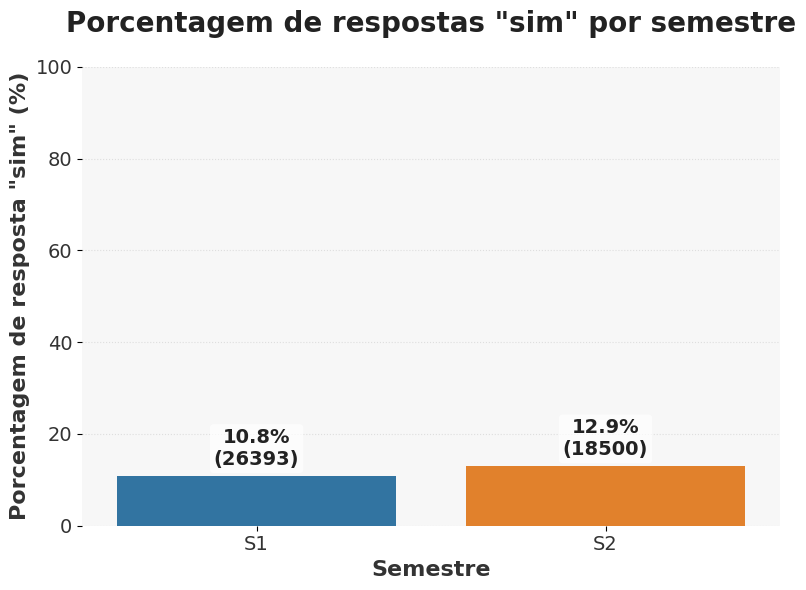

In [166]:

proporcao_semestre = df.groupby('semester_2017')['response'].agg(['mean', 'count'])
proporcao_semestre['percent'] = proporcao_semestre['mean'] * 100

ordem_semestres = sorted(df['semester_2017'].unique())
proporcao_semestre = proporcao_semestre.loc[ordem_semestres]


fig, ax = plt.subplots(figsize=(8,6))

cores = ['#1f77b4', '#ff7f0e'][:len(proporcao_semestre)]

barras = sns.barplot(
    x=proporcao_semestre.index,
    y=proporcao_semestre['percent'],
    palette=cores,
    ax=ax
)


ax.set_ylabel('Porcentagem de resposta "sim" (%)', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Semestre', fontsize=16, fontweight='bold', color='#333333')
ax.set_title('Porcentagem de respostas "sim" por semestre', fontsize=20, fontweight='bold', color='#222222', pad=25)
ax.set_ylim(0, 100)
ax.set_facecolor('#f7f7f7')
sns.despine(left=True, bottom=True)
ax.grid(axis='y', linestyle=':', alpha=0.35, zorder=0)
ax.set_axisbelow(True)
plt.yticks(fontsize=14, color='#333333')

for i, bar in enumerate(barras.patches):
    altura = bar.get_height()
    total = int(proporcao_semestre['count'].iloc[i])
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + 1.5,
        f"{altura:.1f}%\n({total})",
        ha='center', va='bottom', fontsize=14, fontweight='bold', color='#222222',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.7)
    )

ax.set_xticklabels(proporcao_semestre.index, rotation=0, fontsize=14, color='#333333')

plt.tight_layout()
plt.show()

| Categoria     | WoE       | Interpretação                   |
|---------------|-----------|--------------------------------|
| 1° Semestre   | -0.087327 | Leve tendência à recusa        |
| 2° Semestre   | 0.115293  | Leve tendência a aceitar       |

- **Information Value (IV) total:** 0.0101 → **Sem poder preditivo**  

Os valores indicam que **nenhum dos semestres apresenta relação significativa** com a variável alvo.  
Portanto, a variável `semester` será **removida**.


In [167]:
df = df.drop(columns=['semester_2017'])


## 6. Análise Multivariada

In [168]:
df.head()

,balance,housing,duration,campaign,previous,response,job,contacted_cellphone,was_p_contacted,edu_num
0,2143.0,1,261.0,1.0,0,0,management,0,0,3
1,29.0,1,151.0,1.0,0,0,technician,0,0,2
2,2.0,1,76.0,1.0,0,0,entrepreneur,0,0,2
3,1506.0,1,92.0,1.0,0,0,blue-collar,0,0,1
5,231.0,1,139.0,1.0,0,0,management,0,0,3


Após a análise e remoção de variáveis com baixo poder preditivo, passamos de **17 variáveis para 10**.  

Antes de avançarmos para a **análise multivariada**, é importante verificar se existe **algum tipo de colinearidade** entre as variáveis restantes, para evitar problemas..

#### Verificação de Colinearidade

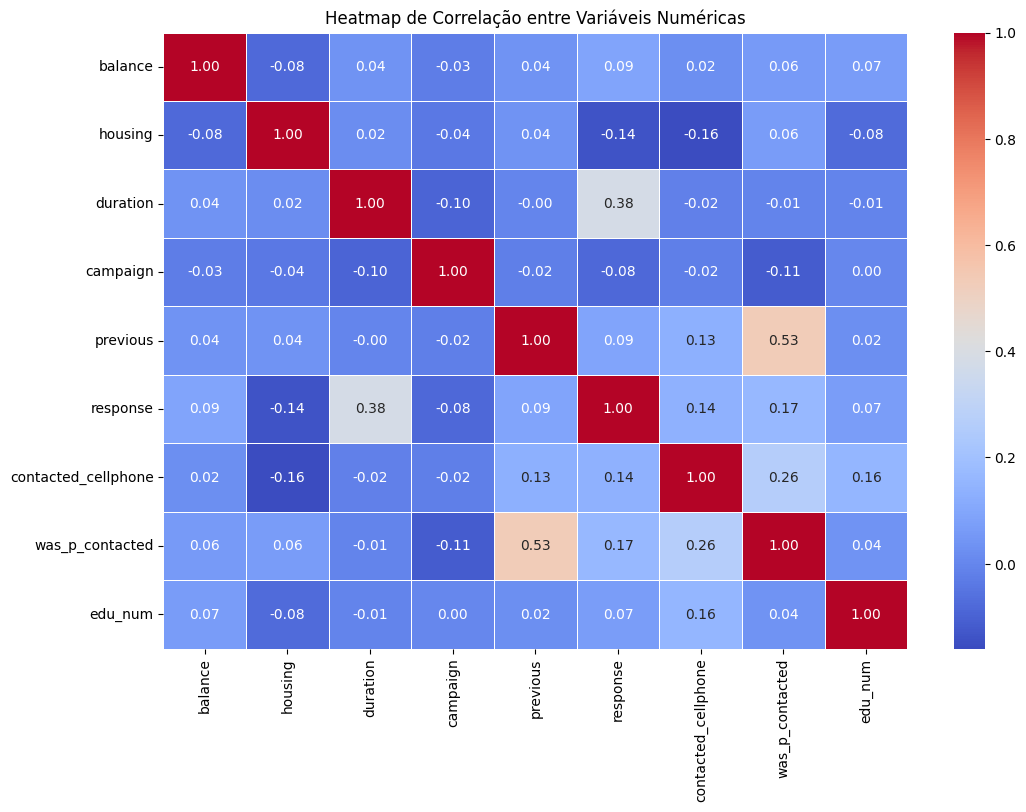

In [169]:

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlação entre Variáveis Numéricas")
plt.show()


- A maior correlação entre variáveis explicativas é **previous × was_p_contacted = 0.53**.  
  - Essa é uma correlação **moderada**, mas ainda **abaixo do limite crítico** para colinearidade séria (geralmente > 0.8).  
  - Poderíamos considerar remover uma delas se ambas fornecessem a mesma informação. No entanto:
    - `was_p_contacted` indica que há **maior aceitação quando a pessoa foi contatada anteriormente**.  
    - `previous` mostra que a **aceitação aumenta com o número de contatos**, até cerca de 10 contatos.

- As demais correlações estão muito próximas de **zero**, indicando que as variáveis restantes **trazem informações independentes**.


#### Para que serve Análise Multivariada?

O objetivo da análise multivariada é:

- Descobrir **interações e padrões** que não aparecem quando analisamos cada variável isoladamente.  
- Entender se a **combinação de fatores** (ex.: idade e saldo) cria perfis mais propensos a aceitar a oferta.  
- Fornecer **insumos para segmentação, decisões de negócio ou construção de modelos**.

Antes de cruzarmos todas as variáveis, vamos **considerar os tipos de variáveis e os objetivos da análise**.



#### Primeiro estudo: Duração da ligação × Saldo

- Pergunta que queremos responder:  
  **Clientes com maior saldo também tendem a permanecer mais tempo na ligação?**

Primeiro, vamos criar um **gráfico** para verificar se existe alguma **relação visível** entre a duração da ligação e o saldo dos clientes.

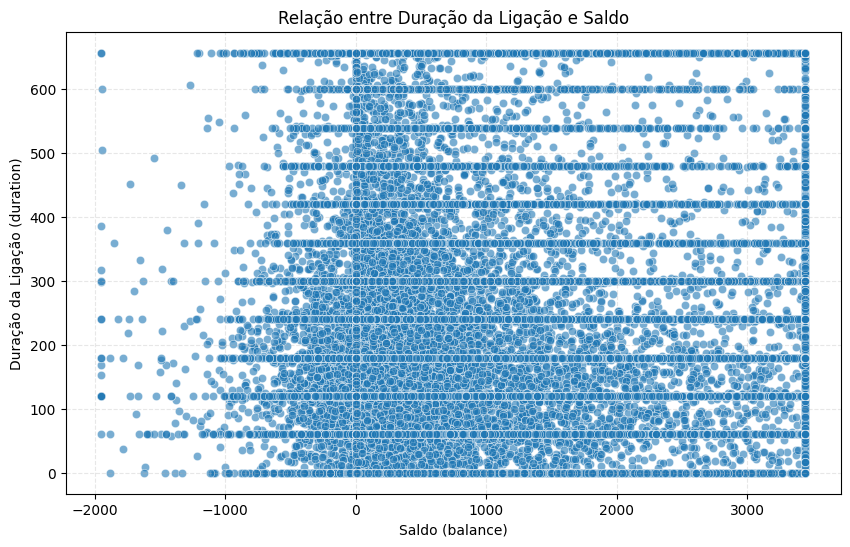

In [170]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='balance', y='duration', alpha=0.6)
plt.title('Relação entre Duração da Ligação e Saldo')
plt.xlabel('Saldo (balance)')
plt.ylabel('Duração da Ligação (duration)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


O gráfico apresenta uma **nuvem dispersa**, sem padrão linear ou curvilíneo evidente.  
Isso sugere que **saldo e duração da ligação não estão diretamente relacionados**, respondendo parcialmente nossa pergunta.  

Mesmo assim, vamos analisar se a **combinação dessas duas variáveis** possui alguma correlação com a variável `response`.

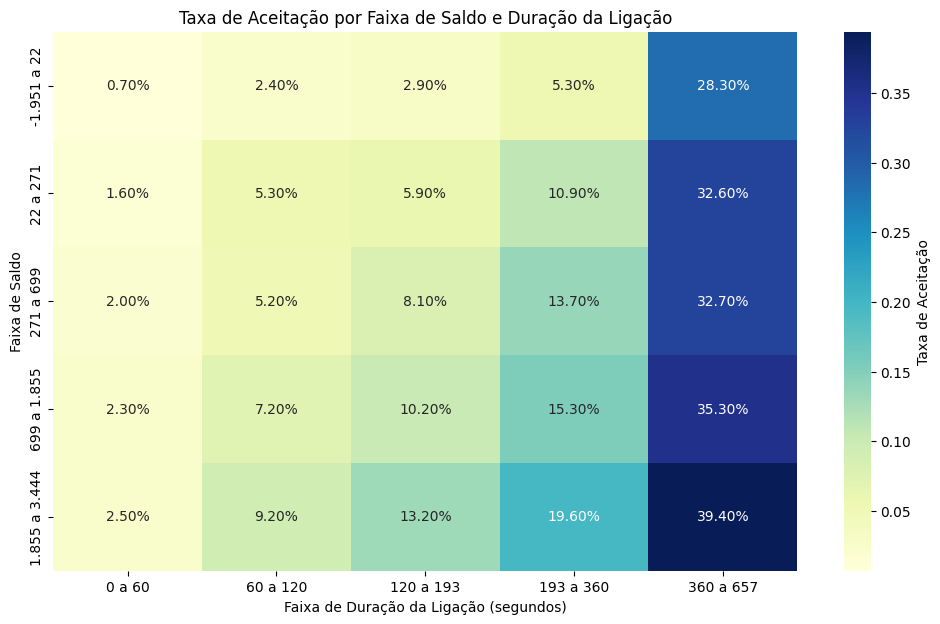

In [171]:

faixas_balance = pd.qcut(df['balance'], q=5, duplicates='drop')
faixas_balance = faixas_balance.apply(lambda x: f"{int(x.left):,} a {int(x.right):,}".replace(",", "."))
df['balance_bin'] = faixas_balance

faixas_duration = pd.qcut(df['duration'], q=5, duplicates='drop')
faixas_duration = faixas_duration.apply(lambda x: f"{int(x.left)} a {int(x.right)}")
df['duration_bin'] = faixas_duration


tabela = pd.crosstab(
    df['balance_bin'], 
    df['duration_bin'], 
    values=df['response'], 
    aggfunc='mean'
).round(3)


tabela.index.name = 'Faixa de Saldo'
tabela.columns.name = 'Faixa de Duração'


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(tabela, annot=True, fmt=".2%", cmap="YlGnBu", cbar_kws={'label': 'Taxa de Aceitação'})
plt.title('Taxa de Aceitação por Faixa de Saldo e Duração da Ligação')
plt.xlabel('Faixa de Duração da Ligação (segundos)')
plt.ylabel('Faixa de Saldo')
plt.show()

- Observa-se que a taxa de aceitação é **alta (39%)** para clientes com **duração da ligação acima de 360 segundos** e **saldo entre 1.855 e 3.444**.  
- No entanto, antes de tirar conclusões, vamos **analisar a variável `duration` isoladamente**.

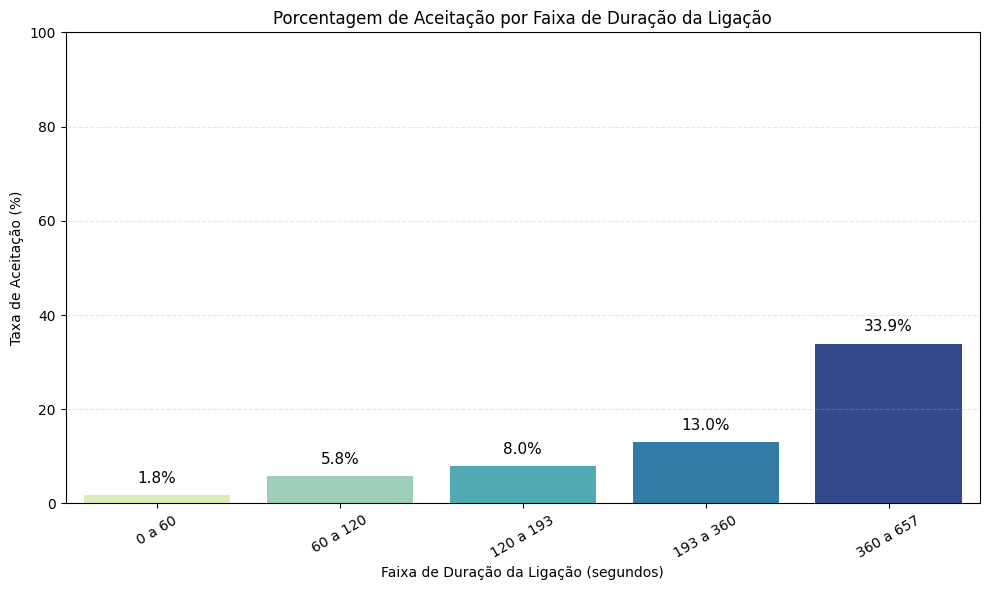

In [172]:

taxa_aceitacao_duracao = df.groupby('duration_bin')['response'].mean() * 100

plt.figure(figsize=(10,6))
barras = sns.barplot(x=taxa_aceitacao_duracao.index, y=taxa_aceitacao_duracao.values, palette='YlGnBu')
plt.ylabel('Taxa de Aceitação (%)')
plt.xlabel('Faixa de Duração da Ligação (segundos)')
plt.title('Porcentagem de Aceitação por Faixa de Duração da Ligação')
plt.xticks(rotation=30)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()


for i, valor in enumerate(taxa_aceitacao_duracao.values):
    plt.text(i, valor + 2, f"{valor:.1f}%", ha='center', va='bottom', fontsize=11, color='black')

plt.show()


if 'duration_bin' in df.columns:
    df.drop(columns=['duration_bin'], inplace=True)



- A **taxa de aceitação** aumenta em torno de **5%** com o aumento da duração da ligação.  
- Esse incremento **não é suficientemente expressivo** para indicar um efeito relevante por si só.

#### Segundo Estudo: Duração da ligação × Contato anterior

- Pergunta que queremos responder:   

    **Vale a pena passar mais tempo na ligação com clientes que já foram contatados antes?**

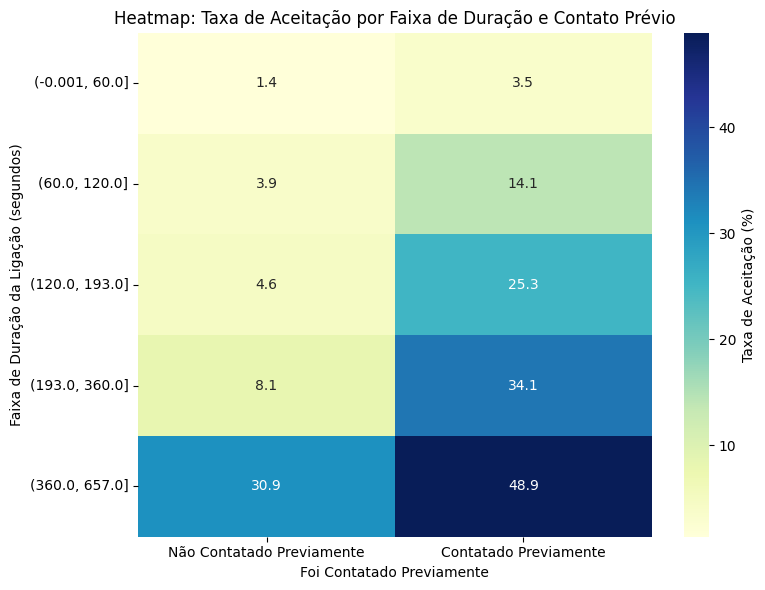

In [173]:

if 'duration_bin' not in df.columns:
    bins_duration = pd.qcut(df['duration'], 5, duplicates='drop')
    df['duration_bin'] = bins_duration

tabela_duration_contacted = pd.crosstab(
    df['duration_bin'],
    df['was_p_contacted'],
    values=df['response'],
    aggfunc='mean'
).fillna(0)


if 1 in tabela_duration_contacted.columns:
    tabela_duration_contacted.columns = ['Não Contatado Previamente', 'Contatado Previamente']
else:
    tabela_duration_contacted.columns = ['Não Contatado Previamente']

tabela_duration_contacted_perc = tabela_duration_contacted * 100


plt.figure(figsize=(8, 6))
sns.heatmap(
    tabela_duration_contacted_perc,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Taxa de Aceitação (%)'}
)
plt.title('Heatmap: Taxa de Aceitação por Faixa de Duração e Contato Prévio')
plt.xlabel('Foi Contatado Previamente')
plt.ylabel('Faixa de Duração da Ligação (segundos)')
plt.tight_layout()
plt.show()


colunas_para_remover = []
if 'duration_bin' in df.columns:
    colunas_para_remover.append('duration_bin')
if 'balance_bin' in df.columns:
    colunas_para_remover.append('balance_bin')
if colunas_para_remover:
    df.drop(columns=colunas_para_remover, inplace=True)


- Para clientes **contatados em campanhas anteriores**, a taxa de aceitação **aumenta mais de 18%** quando a duração da ligação passa de 360 para 657 segundos.  
- Isso indica que, **para clientes já contatados**, é vantajoso **passar mais tempo na ligação** para aumentar a probabilidade de aceitação.

- Esse exemplo demonstra como conduzir a **análise multivariada** das variáveis.  
- O mesmo procedimento será aplicado a todas as **variáveis relevantes**, e no projeto final serão mantidas apenas aquelas que se mostrarem **verdadeiramente interessantes**.

In [174]:
df.head()

,balance,housing,duration,campaign,previous,response,job,contacted_cellphone,was_p_contacted,edu_num
0,2143.0,1,261.0,1.0,0,0,management,0,0,3
1,29.0,1,151.0,1.0,0,0,technician,0,0,2
2,2.0,1,76.0,1.0,0,0,entrepreneur,0,0,2
3,1506.0,1,92.0,1.0,0,0,blue-collar,0,0,1
5,231.0,1,139.0,1.0,0,0,management,0,0,3



#### Terceiro estudo: Duração da ligação × previous

- Pergunta que queremos responder:  
  **Até que ponto a duração da ligação pode fazer um cliente saturado aceitar?**

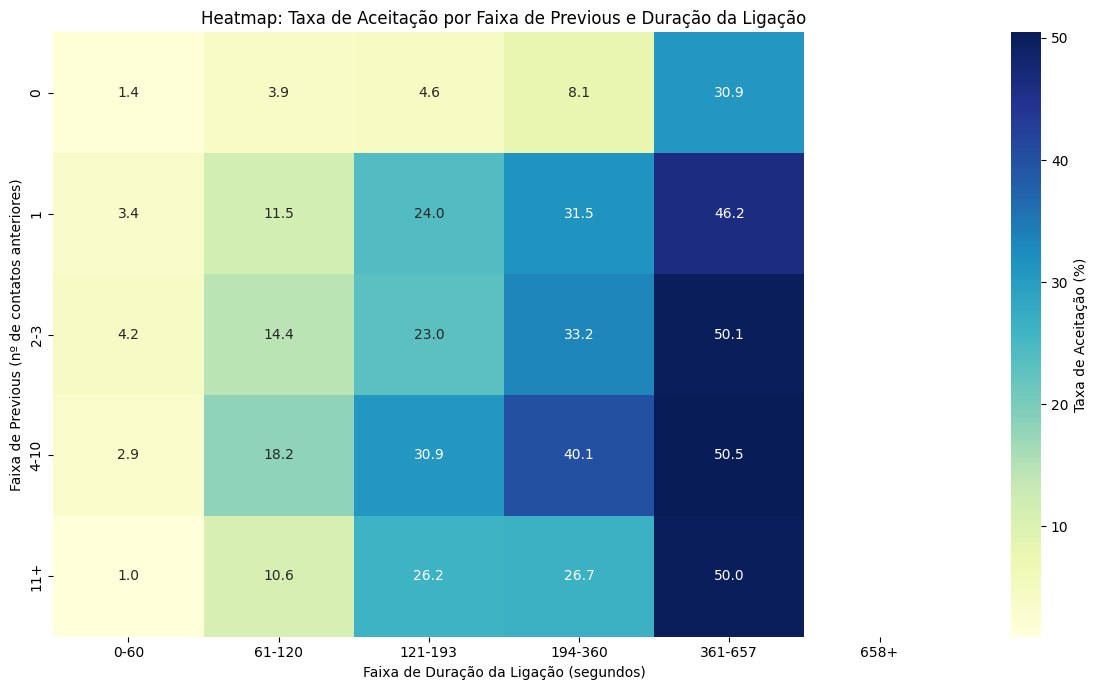

In [175]:

bins_previous = [-1, 0, 1, 3, 10, df['previous'].max()]
bins_previous = sorted(list(set(bins_previous)))
labels_previous = ['0', '1', '2-3', '4-10', '11+'][:len(bins_previous)-1]
df['previous_faixa'] = pd.cut(df['previous'], bins=bins_previous, labels=labels_previous, include_lowest=True)

max_duration = df['duration'].max()
bins_duration = [0, 60, 120, 193, 360, 657]
if max_duration > 657:
    bins_duration.append(max_duration)
else:
    bins_duration.append(658)
bins_duration = sorted(list(set(bins_duration)))
labels_duration = ['0-60', '61-120', '121-193', '194-360', '361-657', '658+'][:len(bins_duration)-1]
df['duration_faixa'] = pd.cut(df['duration'], bins=bins_duration, labels=labels_duration, include_lowest=True)


tabela_prev_dur = df.groupby(['previous_faixa', 'duration_faixa'])['response'].mean().unstack() * 100

plt.figure(figsize=(12, 7))
sns.heatmap(
    tabela_prev_dur,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Taxa de Aceitação (%)'}
)
plt.title('Heatmap: Taxa de Aceitação por Faixa de Previous e Duração da Ligação')
plt.xlabel('Faixa de Duração da Ligação (segundos)')
plt.ylabel('Faixa de Previous (nº de contatos anteriores)')
plt.tight_layout()
plt.show()

df = df.drop(columns=['previous_faixa', 'duration_faixa'])


 1. Efeito mais forte em durações curtas/intermediárias
- Para **ligações com menos de 120 segundos**, clientes que já foram contatados **1 ou mais vezes** apresentam maior taxa de aceitação do que os que nunca foram contatados.  
- Exemplo: na faixa **61–120 segundos**, a taxa sobe de **3,9% (previous = 0)** para **14,4% (previous = 2–3)**.

 2. Saturação em contatos excessivos
- O grupo **previous = 11+** apresenta **taxas menores** que os grupos intermediários para durações curtas/médias, confirmando observações anteriores.  
- Para durações **muito altas (>360s)**, a taxa volta a aproximadamente **50%**, mostrando que ainda é possível converter clientes saturados se a conversa for longa.

Conclusão
- É importante investir em **durações de ligação mais longas** para clientes com contatos prévios.  
- O efeito é especialmente relevante para clientes com **3 a 10 contatos anteriores**, pois a taxa de aceitação cresce drasticamente, chegando a 50%.  
- Para **11 contatos ou mais**, a taxa começa a cair, mas ainda assim, **ligações longas aumentam significativamente a probabilidade de aceitação**.


#### Quarto estudo: Cliente contatado anteriormente x Contatado ou não por celular.

- Pergunta que queremos responder:  
  **Há alguma diferença na aceitação para clientes contatados anteriormente se o contato for feito por celular?**

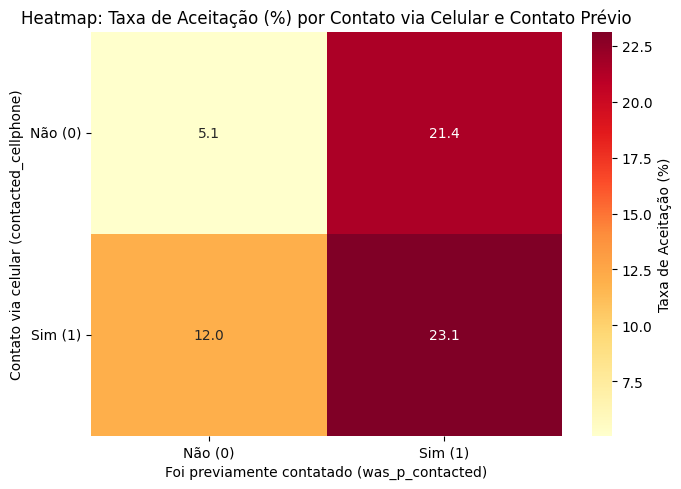

In [176]:

tabela_heatmap = df.groupby(['contacted_cellphone', 'was_p_contacted'])['response'].mean().unstack() * 100

plt.figure(figsize=(7,5))
sns.heatmap(
    tabela_heatmap,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Taxa de Aceitação (%)'}
)
plt.title('Heatmap: Taxa de Aceitação (%) por Contato via Celular e Contato Prévio')
plt.xlabel('Foi previamente contatado (was_p_contacted)')
plt.ylabel('Contato via celular (contacted_cellphone)')
plt.yticks([0.5, 1.5], ['Não (0)', 'Sim (1)'], rotation=0)
plt.xticks([0.5, 1.5], ['Não (0)', 'Sim (1)'])
plt.tight_layout()
plt.show()


- Para clientes que **já foram contatados anteriormente**, **o tipo de dispositivo não influencia** a taxa de aceitação. A probabilidade de resposta positiva é semelhante independentemente do canal.  
- Para clientes que **não foram contatados antes**, é recomendado **priorizar o contato via celular**, pois aumenta a chance de aceitação.


#### Quinto estudo: Cliente contatado anteriormnete × Financiamento imobiliário.

- Pergunta que queremos responder:  
  **Clientes com financiamento imobiliário possuem mais chance de aceitar se forem contatados em uma campanha anterior?**

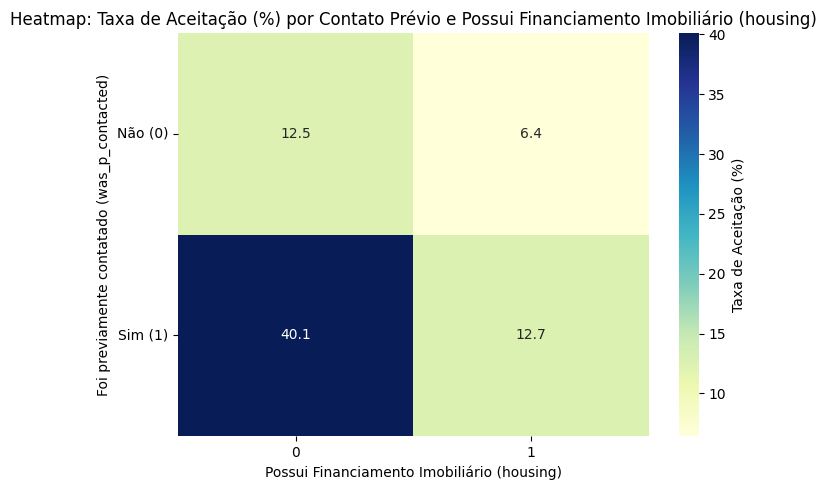

In [177]:

tabela_was_p_housing = df.groupby(['was_p_contacted', 'housing'])['response'].mean().unstack() * 100

plt.figure(figsize=(7, 5))
sns.heatmap(
    tabela_was_p_housing,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Taxa de Aceitação (%)'}
)
plt.title('Heatmap: Taxa de Aceitação (%) por Contato Prévio e Possui Financiamento Imobiliário (housing)')
plt.xlabel('Possui Financiamento Imobiliário (housing)')
plt.ylabel('Foi previamente contatado (was_p_contacted)')
plt.yticks([0.5, 1.5], ['Não (0)', 'Sim (1)'], rotation=0)
plt.tight_layout()
plt.show()


- Para clientes que **possuem financiamento imobiliário**, a probabilidade de aceitar a proposta é **muito baixa**, de modo que **nem mesmo contatos prévios aumentam significativamente a aceitação**.  
- Para clientes que **não possuem financiamento imobiliário**, a chance de aceitação **aumenta consideravelmente** quando já foram contatados anteriormente.

## 7. Conclusão

A análise permitiu identificar os principais fatores que influenciam a aceitação de propostas de depósito a prazo pelos clientes, revelando padrões importantes para a estratégia de abordagem.

### Principais insights:

1. **Duração da ligação (`duration`)**
   - É o fator mais determinante, apresentando a maior correlação positiva com a resposta.  
   - Ligações mais longas, especialmente acima de 360 segundos, aumentam substancialmente a taxa de conversão.  
   - O efeito é ainda mais expressivo para clientes que já haviam sido contatados anteriormente.

2. **Histórico de contatos prévios (`previous`)**
   - Clientes contatados em campanhas anteriores apresentam **mais que o dobro da taxa de aceitação** em relação aos que nunca foram contatados.  
   - Existe um limite: **contatos excessivos (11 ou mais)** tendem a reduzir a eficácia, embora conversas longas ainda possam recuperar parte da conversão.

3. **Canal de contato (`contact_cellphone`)**
   - Chamadas para celular aumentam a probabilidade de aceitação **entre clientes sem contato prévio**.  
   - Para clientes já contatados, o canal **não influencia significativamente**.

4. **Características financeiras e pessoais**
   - **Saldo bancário (`balance`)**: clientes com saldos mais altos, especialmente acima de R$ 3.000, apresentam taxas superiores de aceitação.  
   - **Financiamento habitacional (`housing`)**: clientes com financiamento ativo têm menor propensão a aceitar, efeito que não é compensado por contato prévio.  
   - **Ocupação (`job`)**: estudantes, aposentados e desempregados apresentam alta propensão à aceitação, enquanto perfis operacionais, como blue-collar e housemaid, mostram maior tendência à recusa.  
   - **Escolaridade (`edu_num`)**: taxa de aceitação aumenta conforme o nível educacional cresce.  
   - **Número de contatos na mesma campanha (`campaign`)**: taxa de aceitação diminui conforme o cliente é contatado mais vezes na mesma campanha.

5. **Variáveis com baixo impacto**
   - Idade, salário, empréstimos pessoais e inadimplência apresentaram correlações muito baixas, não sendo prioritárias para segmentação direta.

### Estratégia recomendada

- **Priorizar clientes com histórico de contato anterior**, especialmente com **duração de ligação prolongada (360–657 segundos)**.  
- **Focar em chamadas para celular** quando se tratar de clientes sem contato prévio.  
- **Evitar excesso de tentativas** dentro da mesma campanha, prevenindo saturação.  
- **Segmentar por perfil**: clientes com saldo elevado, sem financiamento habitacional, maior escolaridade e profissões associadas a maior propensão de aceitação (estudante, aposentado e desempregado).

Em resumo, a análise fornece subsídios claros para **otimizar recursos, melhorar a taxa de conversão e reduzir esforços improdutivos**, permitindo que a empresa direcione suas ações de forma mais assertiva e eficiente.


In [178]:
df.to_csv('data/bank_customers_processed.csv', index=False)
print("Arquivo 'data/bank_customers_processed.csv' gerado com sucesso.")

Arquivo 'data/bank_customers_processed.csv' gerado com sucesso.
